‚úÖ ÌïÑÌÑ∞ÎßÅ ÌõÑ Í≤ΩÍ∏∞ Ïàò: 1669
‚úÖ Ìè¨Ìï®Îêú Í∞êÎèÖ Ïàò: 28
‚úÖ ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['Ï†êÏú†Ïú®', 'Ìå®Ïä§ÏÑ±Í≥µÎ•†(%)', 'Ìå®Ïä§ ÏÑ±Í≥µ', 'ÌÇ§Ìå®Ïä§', 'Í≥µÍ≤©ÏßÑÏòÅ Ìå®Ïä§', 'Ï§ëÏïôÏßÄÏó≠ Ìå®Ïä§', 'ÏàòÎπÑÏßÑÏòÅ Ìå®Ïä§', 'Î°±Ìå®Ïä§', 'Ï§ëÍ±∞Î¶¨Ìå®Ïä§', 'Îã®Í±∞Î¶¨Ìå®Ïä§', 'Ï†ÑÎ∞©Ìå®Ïä§', 'Ìö°Ìå®Ïä§', 'ÌõÑÎ∞©Ìå®Ïä§', 'ÌÅ¨Î°úÏä§', 'Ìå®Ïä§', 'Í≥µÍ≤©ÏßÑÏòÅ Ìå®Ïä§ ÎπÑÏú®', 'Îã®Í±∞Î¶¨Ìå®Ïä§ ÎπÑÏú®', 'Ï†ÑÎ∞©Ìå®Ïä§ ÎπÑÏú®']
‚úÖ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: 1669
‚úÖ ÏÜåÏÜçÎèÑ ‚â• 0.6 Í∏∞Ï§Ä Ïã†Î¢∞ ÏÉòÌîå Ïàò: 1337
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò:
trusted_cluster
2    521
0    464
1    352
Name: count, dtype: int64
‚úÖ Silhouette Score: 0.485
‚úÖ Davies-Bouldin Index: 0.697 (ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)
‚úÖ Calinski-Harabasz Score: 2413.819 (ÌÅ¥ÏàòÎ°ù Ï¢ãÏùå)


/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1026127429.py:114: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1026127429.py:115: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.savefig('fuzzy_filtered_plot.png')
/Users/mac_air/PycharmProjects/K-league-pipeline-project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


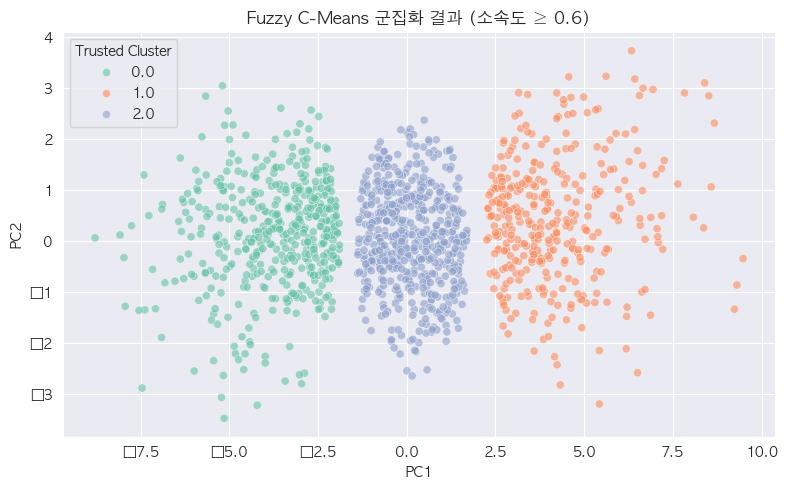

In [3]:
from fcmeans import FCM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Mac Í∏∞Ï§Ä, ÌïÑÏöî Ïãú Windows/UbuntuÏóê ÎßûÍ≤å ÏàòÏ†ï)
plt.rcParams['font.family'] = 'AppleGothic'

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv('dataset.csv')

# ‚úÖ Î∂ÑÏÑù Ï°∞Í±¥ ÏÑ§Ï†ï
min_games_base = 6   # 1R Í∞êÎèÖ ÏµúÏÜå Í≤ΩÍ∏∞ Ïàò
min_games_mid = 20   # Ï§ëÎèÑ Î∂ÄÏûÑ Í∞êÎèÖ ÏµúÏÜå Í≤ΩÍ∏∞ Ïàò
season_col = 'ÎÖÑÎèÑ'
round_col = 'ÎùºÏö¥Îìú'
manager_col = 'Í∞êÎèÖ'

# ‚úÖ ÏãúÏ¶å-ÌåÄ Îã®ÏúÑÎ°ú 1ÎùºÏö¥Îìú ÎãπÏãú Í∞êÎèÖ Ï∂îÏ∂ú
first_round_df = df[df[round_col] == 1][[season_col, 'Íµ¨Îã®', manager_col]]
first_round_df = first_round_df.rename(columns={manager_col: 'Í∞úÎßâÍ∞êÎèÖ'})

# ‚úÖ Í∞êÎèÖÎ≥Ñ ÏãúÏ¶å ÎÇ¥ ÏßÄÌúò Í≤ΩÍ∏∞ Ïàò Í≥ÑÏÇ∞
manager_season_counts = (
    df.groupby([season_col, 'Íµ¨Îã®', manager_col])
    .size()
    .reset_index(name='Í≤ΩÍ∏∞Ïàò')
)

# ‚úÖ Í∞úÎßâÍ∞êÎèÖ Ï†ïÎ≥¥ merge
merged = pd.merge(manager_season_counts, first_round_df,
                  on=[season_col, 'Íµ¨Îã®'], how='left')

# ‚úÖ Ìè¨Ìï® Ï°∞Í±¥: (1R ÏßÄÌúò + min_games_base) or (Ï§ëÎèÑ Î∂ÄÏûÑ + min_games_mid)
condition_starting = (merged[manager_col] == merged['Í∞úÎßâÍ∞êÎèÖ']) & (merged['Í≤ΩÍ∏∞Ïàò'] >= min_games_base)
condition_midseason = (merged[manager_col] != merged['Í∞úÎßâÍ∞êÎèÖ']) & (merged['Í≤ΩÍ∏∞Ïàò'] >= min_games_mid)

valid_managers_df = merged[condition_starting | condition_midseason]

# ‚úÖ Ïú†Ìö® Í∞êÎèÖÎßå ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df = pd.merge(
    df,
    valid_managers_df[[season_col, 'Íµ¨Îã®', manager_col]],
    on=[season_col, 'Íµ¨Îã®', manager_col],
    how='inner'
)

print(f"‚úÖ ÌïÑÌÑ∞ÎßÅ ÌõÑ Í≤ΩÍ∏∞ Ïàò: {len(df)}")
print(f"‚úÖ Ìè¨Ìï®Îêú Í∞êÎèÖ Ïàò: {df['Í∞êÎèÖ'].nunique()}")

# 2. ÌîºÏ≤ò ÏÑ†ÌÉù Î∞è Ïä§ÏºÄÏùºÎßÅ
X = df.drop(columns=['ÎÖÑÎèÑ', 'ÎùºÏö¥Îìú', 'Íµ¨Îã®', 'Í∞êÎèÖ', 'ÏÉÅÎåÄ', 'ÎìùÏ†ê', 'Ïã§Ï†ê'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. ÎπÑÏßÄÎèÑ ÌîºÏ≤ò ÏÑ†ÌÉù (VarianceThreshold)
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X_scaled)
selected_columns = X.columns[selector.get_support()]
print("‚úÖ ÏÑ†ÌÉùÎêú ÌîºÏ≤ò:", selected_columns.tolist())

# 4. PCA (2Ï∞®Ïõê ÏãúÍ∞ÅÌôîÏö©)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# 1. Fuzzy C-Means Ï†ÅÏö©
fcm = FCM(n_clusters=3, m=2.0, random_state=42)  # mÏùÄ ÌçºÏßÄ Í≥ÑÏàò
fcm.fit(X_pca)

# 2. ÏÜåÏÜçÎèÑ ÌñâÎ†¨ (n_samples √ó n_clusters)
membership_matrix = fcm.u

# 3. Í∞ÄÏû• ÎÜíÏùÄ ÏÜåÏÜçÎèÑÏôÄ Ìï¥Îãπ Íµ∞Ïßë ÎùºÎ≤®
df['fuzzy_cluster'] = membership_matrix.argmax(axis=1)
df['max_membership'] = membership_matrix.max(axis=1)

# 4. Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî Íµ∞ÏßëÎßå ÌïÑÌÑ∞ÎßÅ (threshold=0.6)
threshold = 0.6
df['trusted_cluster'] = df['fuzzy_cluster'].where(df['max_membership'] >= threshold, np.nan)

# 5. ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
filtered_df = df[df['trusted_cluster'].notna()].copy()
filtered_df['trusted_cluster'] = filtered_df['trusted_cluster'].astype(int)

print(f"‚úÖ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: {len(df)}")
print(f"‚úÖ ÏÜåÏÜçÎèÑ ‚â• {threshold} Í∏∞Ï§Ä Ïã†Î¢∞ ÏÉòÌîå Ïàò: {len(filtered_df)}")
print(f"‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò:\n{filtered_df['trusted_cluster'].value_counts()}")

# 6. Íµ∞Ïßë ÌíàÏßà ÌèâÍ∞Ä (filtered data Í∏∞Ï§Ä)
sil_score = silhouette_score(X_pca[filtered_df.index], filtered_df['trusted_cluster'])
db_score = davies_bouldin_score(X_pca[filtered_df.index], filtered_df['trusted_cluster'])
ch_score = calinski_harabasz_score(X_pca[filtered_df.index], filtered_df['trusted_cluster'])

print(f"‚úÖ Silhouette Score: {sil_score:.3f}")
print(f"‚úÖ Davies-Bouldin Index: {db_score:.3f} (ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)")
print(f"‚úÖ Calinski-Harabasz Score: {ch_score:.3f} (ÌÅ¥ÏàòÎ°ù Ï¢ãÏùå)")

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df['trusted_cluster'],
    palette='Set2', alpha=0.6
)
plt.title(f'Fuzzy C-Means Íµ∞ÏßëÌôî Í≤∞Í≥º (ÏÜåÏÜçÎèÑ ‚â• {threshold})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Trusted Cluster')
plt.tight_layout()
plt.savefig('fuzzy_filtered_plot.png')
plt.show()



In [4]:
def calc_points(row):
    diff = row['ÎìùÏ†ê'] - row['Ïã§Ï†ê']
    if diff > 0:
        return 3
    elif diff == 0:
        return 1
    else:
        return 0

df['ÏäπÏ†ê'] = df.apply(calc_points, axis=1)

# trusted_cluster Í∏∞Ï§ÄÏúºÎ°ú ÏÑ±Í≥º ÎπÑÍµê
result = (
    df[df['max_membership'] >= 0.6]
    .groupby('trusted_cluster')
    .agg(ppm=('ÏäπÏ†ê', lambda x: x.sum()/len(x)),
         ÎìùÏ†êÌèâÍ∑†=('ÎìùÏ†ê', 'mean'),
         Ïã§Ï†êÌèâÍ∑†=('Ïã§Ï†ê', 'mean'),
         ÏÉòÌîåÏàò=('ÏäπÏ†ê', 'count'))
    .reset_index()
)
print(result)


   trusted_cluster       ppm      ÎìùÏ†êÌèâÍ∑†      Ïã§Ï†êÌèâÍ∑†  ÏÉòÌîåÏàò
0              0.0  1.646552  1.364224  1.088362  464
1              1.0  1.187500  1.218750  1.355114  352
2              2.0  1.305182  1.213052  1.297505  521


In [5]:
crosstab_team = pd.crosstab(df['Íµ¨Îã®'], df[f'trusted_cluster'])

print(crosstab_team)

trusted_cluster  0.0  1.0  2.0
Íµ¨Îã®                            
Í∞ïÏõê                48   15   42
Í¥ëÏ£º                33   25   41
ÍπÄÏ≤ú                10   17   18
ÎåÄÍµ¨                88    4   33
ÎåÄÏ†Ñ                27   11   24
ÏÑúÏö∏                14   49   39
ÏÑ±ÎÇ®                28    1   23
ÏàòÏõê                32   10   33
ÏàòÏõêFC              41   31   57
Ïö∏ÏÇ∞                 6   78   27
Ïù∏Ï≤ú                50   15   49
Ï†ÑÎ∂Å                25   28   46
Ï†úÏ£º                38   25   47
Ìè¨Ìï≠                24   43   42


In [6]:
from scipy.stats import chi2_contingency
algorithm = 'trusted_cluster'
# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2_team, p_team, dof_team, expected_team = chi2_contingency(crosstab_team)

print(f" [Íµ¨Îã® vs {algorithm} Íµ∞Ïßë] Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ:", chi2_team)
print("p-value:", p_team)
print("ÏûêÏú†ÎèÑ:", dof_team)

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
crosstab_manager = pd.crosstab(filtered_df['Í∞êÎèÖ'], filtered_df[f'{algorithm}'])
chi2_mgr, p_mgr, dof_mgr, expected_mgr = chi2_contingency(crosstab_manager)

print(f" [Í∞êÎèÖ vs {algorithm} Íµ∞Ïßë] Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ:", chi2_mgr)
print("p-value:", p_mgr)
print("ÏûêÏú†ÎèÑ:", dof_mgr)
print(crosstab_manager)

 [Íµ¨Îã® vs trusted_cluster Íµ∞Ïßë] Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 293.4333613332795
p-value: 4.3246176294160266e-47
ÏûêÏú†ÎèÑ: 26
 [Í∞êÎèÖ vs trusted_cluster Íµ∞Ïßë] Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 401.0535755087754
p-value: 1.67159253288017e-54
ÏûêÏú†ÎèÑ: 54
trusted_cluster   0   1   2
Í∞êÎèÖ                         
Í∞ÄÎßà               16   1   7
ÍπÄÍ∏∞Îèô              25  42  46
ÍπÄÎÇ®Ïùº              28   1  23
ÍπÄÎèÑÍ∑†              30  19  50
ÍπÄÎëêÌòÑ               5   7   7
ÍπÄÎ≥ëÏàò              12  11  20
ÍπÄÏÉÅÏãù              14  20  33
ÍπÄÏùÄÏ§ë              11  12   7
ÍπÄÌÉúÏôÑ               3  12   6
ÍπÄÌïôÎ≤î               9   4  14
ÍπÄÌò∏ÏòÅ              26   3   6
ÎÇ®Í∏∞Ïùº              29  21  33
Î∞ïÍ±¥Ìïò              17   5  18
Î∞ïÏßÑÏÑ≠               7   5  10
Î∞ïÏ∞ΩÌòÑ              13   2  11
Î∞ïÌÉúÌïò               4  15  11
ÏïàÏùµÏàò               2  30  14
Ïú§Ï†ïÌôò               8   5  16
Ïù¥ÎØºÏÑ±              19   8  17
Ïù¥Î≥ëÍ∑º              37   4  16
Ïù¥Ï†ïÌö®       

In [7]:
def cramers_v(chi2, n, k_row, k_col):
    denom = n * (min(k_row - 1, k_col - 1))
    if denom == 0:
        return None
    return np.sqrt(chi2 / denom)

def compare_cramers_v(v1, v2, n):
    se = np.sqrt((1 - v1**2)/n + (1 - v2**2)/n)
    z = (v2 - v1) / se
    from scipy.stats import norm
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

# ÏÉòÌîå Ïàò (Í≤ΩÍ∏∞ Ïàò)
n = len(filtered_df)

# ÌåÄ vs Íµ∞Ïßë
v_team = cramers_v(chi2_team, n, crosstab_team.shape[0], crosstab_team.shape[1])

# Í∞êÎèÖ vs Íµ∞Ïßë
v_mgr = cramers_v(chi2_mgr, n, crosstab_manager.shape[0], crosstab_manager.shape[1])

print(f" Cram√©r's V (ÌåÄ vs Íµ∞Ïßë): {v_team:.4f}")
print(f" Cram√©r's V (Í∞êÎèÖ vs Íµ∞Ïßë): {v_mgr:.4f}")

z_value, p_value = compare_cramers_v(v_team, v_mgr, n=len(df))

print(f" Z = {z_value:.3f}")
print(f" p-value = {p_value:.5f}")

 Cram√©r's V (ÌåÄ vs Íµ∞Ïßë): 0.3313
 Cram√©r's V (Í∞êÎèÖ vs Íµ∞Ïßë): 0.3873
 Z = 1.735
 p-value = 0.08281


In [8]:
from scipy.stats import f_oneway
import pandas as pd

# 1. Ïã†Î¢∞ ÏÉòÌîåÎßå ÌïÑÌÑ∞ÎßÅ
filtered_df = df[df['max_membership'] >= 0.6].copy()
filtered_df['trusted_cluster'] = filtered_df['trusted_cluster'].astype(int)

# 2. ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏
features = selected_columns.tolist()

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌîºÏ≤ò ÌèâÍ∑†Í∞í Ï∂úÎ†•
feature_means = filtered_df.groupby('trusted_cluster')[features].mean().round(3)
print("‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌîºÏ≤ò ÌèâÍ∑†Í∞í:\n")
print(feature_means)

# 4. Í∞Å ÌîºÏ≤òÏóê ÎåÄÌï¥ ANOVA ÏßÑÌñâ
anova_results = []

for feature in features:
    groups = [group[feature].dropna().values for _, group in filtered_df.groupby('trusted_cluster')]
    stat, pval = f_oneway(*groups)
    anova_results.append({'ÌîºÏ≤ò': feature, 'FÍ∞í': stat, 'pÍ∞í': pval})

anova_df = pd.DataFrame(anova_results).sort_values('pÍ∞í')
anova_df['Ïú†Ïùò'] = anova_df['pÍ∞í'] < 0.05
print("\n‚úÖ ANOVA Í≤∞Í≥º (ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ ÌîºÏ≤ò Ï∞®Ïù¥):\n")
print(anova_df)


‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌîºÏ≤ò ÌèâÍ∑†Í∞í:

                    Ï†êÏú†Ïú®  Ìå®Ïä§ÏÑ±Í≥µÎ•†(%)    Ìå®Ïä§ ÏÑ±Í≥µ    ÌÇ§Ìå®Ïä§  Í≥µÍ≤©ÏßÑÏòÅ Ìå®Ïä§  Ï§ëÏïôÏßÄÏó≠ Ìå®Ïä§  ÏàòÎπÑÏßÑÏòÅ Ìå®Ïä§  \
trusted_cluster                                                                
0                38.844     0.752  260.110  5.651   45.901  136.489   77.720   
1                61.840     0.879  562.832  7.989  108.710  339.057  115.065   
2                50.788     0.831  403.192  6.555   66.825  228.979  107.388   

                    Î°±Ìå®Ïä§    Ï§ëÍ±∞Î¶¨Ìå®Ïä§    Îã®Í±∞Î¶¨Ìå®Ïä§     Ï†ÑÎ∞©Ìå®Ïä§      Ìö°Ìå®Ïä§     ÌõÑÎ∞©Ìå®Ïä§    ÌÅ¨Î°úÏä§  \
trusted_cluster                                                               
0                28.741   92.610  138.759   98.319   98.196   63.595  3.315   
1                40.142  213.787  308.898  184.761  238.514  139.551  5.602   
2                34.664  151.081  217.447  139.309  163.361  100.522  4.399   

                      Ìå®Ïä§  Í≥µÍ≤©ÏßÑÏòÅ Ì

In [9]:
def permutation_test(df, group_col='Í∞êÎèÖ', cluster_col='trusted_cluster',
                     n_permutations=1000, seed=42, verbose=False):
    np.random.seed(seed)

    # 1. Ïã§Ï†ú chi¬≤ ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
    observed_ct = pd.crosstab(df[group_col], df[cluster_col])

    if observed_ct.shape[0] <= 1 or observed_ct.shape[1] <= 1:
        if verbose:
            print("‚ùó Í¥ÄÏ∏° ÍµêÏ∞®Ìëú Ï∞®ÏõêÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑ chi¬≤ Í≥ÑÏÇ∞ Î∂àÍ∞Ä")
        return np.nan, np.nan, []

    try:
        observed_chi2, _, _, _ = chi2_contingency(observed_ct)
    except Exception as e:
        if verbose:
            print(f"‚ùó chi¬≤ Í≥ÑÏÇ∞ Ïò§Î•ò: {e}")
        return np.nan, np.nan, []

    # 2. ÏàúÏó¥ ÌÜµÍ≥ÑÎüâ ÏÉùÏÑ±
    chi2_distribution = []
    successful = 0

    for _ in range(n_permutations):
        shuffled = filtered_df[group_col].sample(frac=1, replace=False).reset_index(drop=True)
        shuffled_df = filtered_df.copy()
        shuffled_df[group_col] = shuffled

        ct = pd.crosstab(shuffled_df[group_col], shuffled_df[cluster_col])

        if ct.shape[0] > 1 and ct.shape[1] > 1:
            try:
                chi2, _, _, _ = chi2_contingency(ct)
                chi2_distribution.append(chi2)
                successful += 1
            except:
                continue

    if verbose:
        print(f"‚úÖ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏàòÌñâÎêú permutation Ïàò: {successful}/{n_permutations}")

    # 3. ÏàúÏó¥ Í≤∞Í≥º ÏóÜÏùå Î∞©ÏßÄ
    if len(chi2_distribution) == 0:
        if verbose:
            print("‚ùó Ïú†Ìö®Ìïú permutation Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")
        return observed_chi2, np.nan, []

    # 4. p-value Í≥ÑÏÇ∞
    p_perm = np.mean(np.array(chi2_distribution) >= observed_chi2)
    return observed_chi2, p_perm, chi2_distribution

team_manager_list = [
    {'Í∞ïÏõê': ['ÍπÄÎ≥ëÏàò', 'ÏµúÏö©Ïàò', 'Ïú§Ï†ïÌôò']},
    {'Í¥ëÏ£º': ['ÍπÄÌò∏ÏòÅ', 'Ïù¥Ï†ïÌö®']},
    {'ÍπÄÏ≤ú': ['ÍπÄÌÉúÏôÑ', 'Ï†ïÏ†ïÏö©']},
    {'ÎåÄÍµ¨': ['Ïù¥Î≥ëÍ∑º', 'Í∞ÄÎßà', 'ÏµúÏõêÍ∂å', 'Î∞ïÏ∞ΩÌòÑ']},
    {'ÎåÄÏ†Ñ': ['Ïù¥ÎØºÏÑ±', 'Ìô©ÏÑ†Ìôç']},
    {'ÏÑúÏö∏': ['Î∞ïÏßÑÏÑ≠', 'ÏïàÏùµÏàò', 'ÍπÄÍ∏∞Îèô']},
    {'ÏàòÏõê': ['Î∞ïÍ±¥Ìïò', 'Ïù¥Î≥ëÍ∑º', 'ÍπÄÎ≥ëÏàò']},
    {'ÏàòÏõêFC': ['ÍπÄÎèÑÍ∑†', 'ÍπÄÏùÄÏ§ë']},
    {'Ï†ÑÎ∂Å': ['ÍπÄÏÉÅÏãù', 'ÍπÄÎëêÌòÑ', 'ÌéòÌä∏Î†àÏä§Ïø†', 'Ï°∞ÏÑ±Ìôò']},
    {'Ï†úÏ£º': ['ÎÇ®Í∏∞Ïùº', 'ÍπÄÌïôÎ≤î']},
    {'Ìè¨Ìï≠': ['ÍπÄÍ∏∞Îèô', 'Î∞ïÌÉúÌïò']}
]

results = []

# Î∂ÑÏÑù Î∞òÎ≥µ
for item in team_manager_list:
    for team, managers in item.items():
        # Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ: Ìï¥Îãπ ÌåÄ + Ìï¥Îãπ Í∞êÎèÖÎì§Îßå
        df_sub = filtered_df[(filtered_df['Íµ¨Îã®'] == team) & (filtered_df['Í∞êÎèÖ'].isin(managers))]

        ct = pd.crosstab(df_sub['Í∞êÎèÖ'], df_sub['trusted_cluster'])

        print(f"\nüìã {team} ÍµêÏ∞®Ìëú")
        print(ct)

        if df_sub['Í∞êÎèÖ'].nunique() >= 2 and df_sub['trusted_cluster'].nunique() > 1 and ct.shape[0] > 1 and ct.shape[1] > 1:
            try:
                chi2, p, dof, expected = chi2_contingency(ct)
                n = df_sub.shape[0]
                v = cramers_v(chi2, n, ct.shape[0], ct.shape[1])
                
                # permutation test
                chi2_val, p_perm, chi2_dist = permutation_test(df_sub)

                print(f"üìä {team} Observed chi¬≤: {chi2_val:.3f}")

                results.append({
                    'ÌåÄ': team,
                    'Í∞êÎèÖ Ïàò': ct.shape[0],
                    'Í≤ΩÍ∏∞ Ïàò': n,
                    'chi2': round(chi2, 3),
                    'p-value': round(p, 5),
                    "Cram√©r's V": round(v, 4) if v is not None else None,
                })

            except Exception as e:
                print(f"‚ùó {team} Í≥ÑÏÇ∞ Ïò§Î•ò:", e)
                results.append({
                    'ÌåÄ': team,
                    'Í∞êÎèÖ Ïàò': ct.shape[0],
                    'Í≤ΩÍ∏∞ Ïàò': df_sub.shape[0],
                    'chi2': None,
                    'p-value': None,
                    "Cram√©r's V": None,
                })
        else:
            results.append({
                'ÌåÄ': team,
                'Í∞êÎèÖ Ïàò': ct.shape[0],
                'Í≤ΩÍ∏∞ Ïàò': df_sub.shape[0],
                'chi2': None,
                'p-value': None,
                "Cram√©r's V": None,
            })

# Í≤∞Í≥º DataFrame ÏÉùÏÑ± Î∞è Ï†ïÎ†¨
df_results = pd.DataFrame(results)
df_results = df_results.sort_values("Cram√©r's V", ascending=False, na_position='last')
print(df_results)


üìã Í∞ïÏõê ÍµêÏ∞®Ìëú
trusted_cluster   0  1   2
Í∞êÎèÖ                        
ÍπÄÎ≥ëÏàò               8  9  13
Ïú§Ï†ïÌôò               8  5  16
ÏµúÏö©Ïàò              32  1  13
üìä Í∞ïÏõê Observed chi¬≤: 23.614

üìã Í¥ëÏ£º ÍµêÏ∞®Ìëú
trusted_cluster   0   1   2
Í∞êÎèÖ                         
ÍπÄÌò∏ÏòÅ              26   3   6
Ïù¥Ï†ïÌö®               7  22  35
üìä Í¥ëÏ£º Observed chi¬≤: 40.907

üìã ÍπÄÏ≤ú ÍµêÏ∞®Ìëú
trusted_cluster  0   1   2
Í∞êÎèÖ                        
ÍπÄÌÉúÏôÑ              3  12   6
Ï†ïÏ†ïÏö©              7   5  12
üìä ÍπÄÏ≤ú Observed chi¬≤: 6.310

üìã ÎåÄÍµ¨ ÍµêÏ∞®Ìëú
trusted_cluster   0  1   2
Í∞êÎèÖ                        
Í∞ÄÎßà               16  1   7
Î∞ïÏ∞ΩÌòÑ              13  2  11
Ïù¥Î≥ëÍ∑º              26  1   8
ÏµúÏõêÍ∂å              33  0   7
üìä ÎåÄÍµ¨ Observed chi¬≤: 9.422

üìã ÎåÄÏ†Ñ ÍµêÏ∞®Ìëú
trusted_cluster   0  1   2
Í∞êÎèÖ                        
Ïù¥ÎØºÏÑ±              19  8  17
Ìô©ÏÑ†Ìôç               8  3   7
üìä ÎåÄÏ†Ñ Observed chi¬≤

In [10]:
filtered_df

ÎÖÑÎèÑ  ÎùºÏö¥Îìú    Íµ¨Îã®   Í∞êÎèÖ    ÏÉÅÎåÄ  ÎìùÏ†ê  Ïã§Ï†ê   Ï†êÏú†Ïú®  Ìå®Ïä§ÏÑ±Í≥µÎ•†(%)  Ìå®Ïä§ ÏÑ±Í≥µ  ...  ÌõÑÎ∞©Ìå®Ïä§  \
1     2021    1    ÏÑúÏö∏  Î∞ïÏßÑÏÑ≠    Ï†ÑÎ∂Å   0   2  48.2      0.76    371  ...    90   
2     2021    1    ÎåÄÍµ¨  Ïù¥Î≥ëÍ∑º  ÏàòÏõêFC   1   1  54.1      0.79    428  ...   104   
3     2021    1  ÏàòÏõêFC  ÍπÄÎèÑÍ∑†    ÎåÄÍµ¨   1   1  45.9      0.78    358  ...    94   
5     2021    1    Ïù∏Ï≤ú  Ï°∞ÏÑ±Ìôò    Ìè¨Ìï≠   1   2  41.3      0.77    315  ...    92   
6     2021    1    ÏàòÏõê  Î∞ïÍ±¥Ìïò    Í¥ëÏ£º   1   0  62.6      0.82    515  ...   140   
...    ...  ...   ...  ...   ...  ..  ..   ...       ...    ...  ...   ...   
1664  2024   38    Í¥ëÏ£º  Ïù¥Ï†ïÌö®    Ï†ÑÎ∂Å   1   1  58.6      0.86    450  ...   111   
1665  2024   38    Ï†ÑÎ∂Å  ÍπÄÎëêÌòÑ    Í¥ëÏ£º   1   1  41.4      0.79    315  ...    85   
1666  2024   38    ÎåÄÍµ¨  Î∞ïÏ∞ΩÌòÑ    Ïù∏Ï≤ú   1   3  47.5      0.80    360  ...    91   
1667  2024   38    ÎåÄÏ†Ñ  Ìô©ÏÑ†Ìôç    Ï†úÏ£º   2   1  46.2      0.82    298  ...    75   
1668  2024   38    Ï†úÏ£º  ÍπÄÌïôÎ≤î    ÎåÄÏ†Ñ   1   2  53.8      0.84    406  ...   102   

      ÌÅ¨Î°úÏä§     Ìå®Ïä§  Í≥µÍ≤©ÏßÑÏòÅ Ìå®Ïä§ ÎπÑÏú®  Îã®Í±∞Î¶¨Ìå®Ïä§ ÎπÑÏú®   Ï†ÑÎ∞©Ìå®Ïä§ ÎπÑÏú®  fuzzy_cluster  \
1       3  488.0    0.141393  0.397541  0.272541              2   
2       3  541.0    0.133087  0.421442  0.301294              2   
3       2  458.0    0.111354  0.517467  0.281659              2   
5       0  409.0    0.097800  0.444988  0.273839              0   
6       7  628.0    0.216561  0.455414  0.286624              1   
...   ...    ...         ...       ...       ...            ...   
1664    6  523.0    0.103250  0.437859  0.304015              2   
1665    5  398.0    0.045226  0.414573  0.248744              0   
1666    5  450.0    0.100000  0.455556  0.286667              2   
1667    3  363.0    0.184573  0.426997  0.319559              0   
1668    2  483.0    0.165631  0.530021  0.312629              2   

      max_membership  trusted_cluster  ÏäπÏ†ê  
1           0.789461                2   0  
2           0.973319                2   1  
3           0.655802                2   1  
5           0.860284                0   0  
6           0.855830                1   3  
...              ...              ...  ..  
1664        0.770877                2   1  
1665        0.706146                0   1  
1666        0.697397                2   0  
1667        0.731118                0   3  
1668        0.695747                2   0  

[1337 rows x 29 columns]

In [11]:
# Íµ∞ÏßëÎ≥Ñ PPM Î¶¨Ïä§Ìä∏
groups = [filtered_df[filtered_df['trusted_cluster'] == k]['ÏäπÏ†ê'] for k in sorted(filtered_df['trusted_cluster'].unique())]

for group in groups:
    print(group)
    print(group.mean())
    
# ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù
f_stat, p_value = f_oneway(*groups)
print(f"üìä ANOVA F = {f_stat:.3f}, p = {p_value:.5f}")


5       0
7       0
12      1
14      0
17      0
       ..
1658    0
1661    3
1662    3
1665    1
1667    3
Name: ÏäπÏ†ê, Length: 464, dtype: int64
1.646551724137931
6       3
8       3
15      3
20      3
23      0
       ..
1639    0
1645    0
1652    0
1657    3
1663    0
Name: ÏäπÏ†ê, Length: 352, dtype: int64
1.1875
1       0
2       1
3       1
9       0
10      1
       ..
1655    1
1656    1
1664    1
1666    0
1668    0
Name: ÏäπÏ†ê, Length: 521, dtype: int64
1.3051823416506718
üìä ANOVA F = 14.795, p = 0.00000


In [12]:
# PPM Í≥ÑÏÇ∞: cluster_kmeans √ó Í∞êÎèÖ √ó Íµ¨Îã® Îã®ÏúÑ
ppm_df = (
    filtered_df.groupby(['trusted_cluster', 'Í∞êÎèÖ', 'Íµ¨Îã®'])
    .agg(Í≤ΩÍ∏∞Ïàò=('ÏäπÏ†ê', 'count'), Ï¥ùÏäπÏ†ê=('ÏäπÏ†ê', 'sum'))
    .reset_index()
)
ppm_df['ppm'] = ppm_df['Ï¥ùÏäπÏ†ê'] / ppm_df['Í≤ΩÍ∏∞Ïàò']

# Í≤∞Í≥º ÌôïÏù∏
print(ppm_df.head())


import statsmodels.formula.api as smf

model_ppm = smf.ols('ppm ~ C(trusted_cluster)', data=ppm_df).fit()
print(model_ppm.summary())

model_ppm_with_club = smf.ols('ppm ~ C(trusted_cluster) + C(Íµ¨Îã®)', data=ppm_df).fit()
print(model_ppm_with_club.summary())


   trusted_cluster   Í∞êÎèÖ    Íµ¨Îã®  Í≤ΩÍ∏∞Ïàò  Ï¥ùÏäπÏ†ê       ppm
0                0   Í∞ÄÎßà    ÎåÄÍµ¨   16   15  0.937500
1                0  ÍπÄÍ∏∞Îèô    ÏÑúÏö∏    5    9  1.800000
2                0  ÍπÄÍ∏∞Îèô    Ìè¨Ìï≠   20   38  1.900000
3                0  ÍπÄÎÇ®Ïùº    ÏÑ±ÎÇ®   28   34  1.214286
4                0  ÍπÄÎèÑÍ∑†  ÏàòÏõêFC   30   45  1.500000
                            OLS Regression Results                            
Dep. Variable:                    ppm   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     20.06
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           6.44e-08
Time:                        19:57:51   Log-Likelihood:                -78.074
No. Observations:                  92   AIC:                             162.1
Df Residuals:                      89   BIC:                             169.7


In [13]:
filtered_df[filtered_df['trusted_cluster'] == 0].groupby('Í∞êÎèÖ')['ÏäπÏ†ê'].mean().sort_values(ascending=False)


Í∞êÎèÖ
ÏïàÏùµÏàò      3.000000
Ìô©ÏÑ†Ìôç      2.750000
ÌéòÌä∏Î†àÏä§Ïø†    2.666667
Ïú§Ï†ïÌôò      2.625000
Î∞ïÌÉúÌïò      2.500000
Ïù¥Ï†ïÌö®      2.285714
ÍπÄÏÉÅÏãù      2.285714
Ï†ïÏ†ïÏö©      2.142857
ÍπÄÏùÄÏ§ë      2.090909
ÌôçÎ™ÖÎ≥¥      2.000000
Ïù¥Î≥ëÍ∑º      1.972973
ÎÇ®Í∏∞Ïùº      1.931034
ÍπÄÍ∏∞Îèô      1.880000
Ïù¥ÎØºÏÑ±      1.842105
Î∞ïÏ∞ΩÌòÑ      1.692308
ÍπÄÌïôÎ≤î      1.666667
Ï°∞ÏÑ±Ìôò      1.620000
Î∞ïÍ±¥Ìïò      1.588235
ÍπÄÎèÑÍ∑†      1.500000
ÏµúÏõêÍ∂å      1.454545
ÏµúÏö©Ïàò      1.437500
ÍπÄÎÇ®Ïùº      1.214286
ÍπÄÎëêÌòÑ      1.200000
ÍπÄÌÉúÏôÑ      1.000000
Í∞ÄÎßà       0.937500
ÍπÄÎ≥ëÏàò      0.916667
ÍπÄÌò∏ÏòÅ      0.846154
Î∞ïÏßÑÏÑ≠      0.714286
Name: ÏäπÏ†ê, dtype: float64

In [14]:
# Ïã†Î¢∞ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÉòÌîåÎßå
trusted_df = df[df['max_membership'] >= 0.6].copy()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï¥ùÏäπÏ†ê / Ï¥ùÍ≤ΩÍ∏∞Ïàò Í≥ÑÏÇ∞
cluster_perf = (
    trusted_df
    .groupby('trusted_cluster')
    .agg(Ï¥ùÏäπÏ†ê=('ÏäπÏ†ê', 'sum'), Ï¥ùÍ≤ΩÍ∏∞Ïàò=('ÏäπÏ†ê', 'count'))
    .assign(ppm=lambda x: x['Ï¥ùÏäπÏ†ê'] / x['Ï¥ùÍ≤ΩÍ∏∞Ïàò'])
)
print(cluster_perf)


                 Ï¥ùÏäπÏ†ê  Ï¥ùÍ≤ΩÍ∏∞Ïàò       ppm
trusted_cluster                     
0.0              764   464  1.646552
1.0              418   352  1.187500
2.0              680   521  1.305182


In [15]:
import statsmodels.api as sm

# Í∞ÄÏ§ëÏπò = Í≤ΩÍ∏∞ Ïàò
weights = ppm_df['Í≤ΩÍ∏∞Ïàò']

# ÌöåÍ∑Ä Î™®Îç∏ (ÌÅ¥Îü¨Ïä§ÌÑ∞Îßå)
model_wls = sm.WLS.from_formula('ppm ~ C(trusted_cluster)', data=ppm_df, weights=weights).fit()
print(model_wls.summary())

# ÌöåÍ∑Ä Î™®Îç∏ (ÌÅ¥Îü¨Ïä§ÌÑ∞ + Íµ¨Îã®)
model_wls_with_club = sm.WLS.from_formula('ppm ~ C(trusted_cluster) + C(Íµ¨Îã®)', data=ppm_df, weights=weights).fit()
print(model_wls_with_club.summary())


                            WLS Regression Results                            
Dep. Variable:                    ppm   R-squared:                       0.131
Model:                            WLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     6.701
Date:                Tue, 08 Jul 2025   Prob (F-statistic):            0.00195
Time:                        19:57:51   Log-Likelihood:                -83.274
No. Observations:                  92   AIC:                             172.5
Df Residuals:                      89   BIC:                             180.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [16]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# ÏòàÏãúÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∂àÎü¨Ïò§Í∏∞
# df = pd.read_csv('your_data.csv')  # ÌòπÏùÄ Ïù¥ÎØ∏ Î°úÎìúÎêú df ÏÇ¨Ïö©

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
ppm_df['trusted_cluster'] = ppm_df['trusted_cluster'].astype('category')
ppm_df['Íµ¨Îã®'] = ppm_df['Íµ¨Îã®'].astype('category')

# ÌöåÍ∑ÄÏãù Ï†ïÏùò
formula = 'ppm ~ C(trusted_cluster) + C(Íµ¨Îã®)'

# OLS Î™®Îç∏ Ï†ÅÌï©
ols_model = smf.ols(formula=formula, data=ppm_df).fit()

# ÏûîÏ∞® Î∞è ÏòàÏ∏°Í∞í Ï∂îÏ∂ú
resid = ols_model.resid
fitted = ols_model.fittedvalues

# Breusch-Pagan test
bp_test = het_breuschpagan(resid, ols_model.model.exog)

# Í≤∞Í≥º Ï∂úÎ†•
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_labels, bp_test)))

# White's test
white_test = het_white(resid, ols_model.model.exog)

# Í≤∞Í≥º Ï∂úÎ†•
white_labels = ['Test Statistic', 'Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(white_labels, white_test)))


{'Lagrange multiplier statistic': 21.90968912124806, 'p-value': 0.11019391939318686, 'f-value': 1.583800815774517, 'f p-value': 0.09846591948895049}
{'Test Statistic': 40.420366882696754, 'Test p-value': 0.49621881367689447, 'F-Statistic': 0.9556704335730517, 'F-Test p-value': 0.5562087990044328}


In [17]:
from tabulate import tabulate

# Breusch-Pagan Test Í≤∞Í≥º
bp_result = {
    "Test": "Breusch-Pagan",
    "LM Statistic": round(bp_test[0], 3),
    "LM p-value": round(bp_test[1], 4),
    "F Statistic": round(bp_test[2], 3),
    "F p-value": round(bp_test[3], 4),
}

# White's Test Í≤∞Í≥º
white_result = {
    "Test": "White",
    "LM Statistic": round(white_test[0], 3),
    "LM p-value": round(white_test[1], 4),
    "F Statistic": round(white_test[2], 3),
    "F p-value": round(white_test[3], 4),
}

# Îëê Í≤∞Í≥ºÎ•º ÌëúÎ°ú Ï∂úÎ†•
print(tabulate([bp_result, white_result], headers="keys", tablefmt="pretty"))


+---------------+--------------+------------+-------------+-----------+
|     Test      | LM Statistic | LM p-value | F Statistic | F p-value |
+---------------+--------------+------------+-------------+-----------+
| Breusch-Pagan |    21.91     |   0.1102   |    1.584    |  0.0985   |
|     White     |    40.42     |   0.4962   |    0.956    |  0.5562   |
+---------------+--------------+------------+-------------+-----------+


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def ratio_viz(team_name):
    team_df = filtered_df[filtered_df['Íµ¨Îã®'] == team_name].copy()

    # Ï†ÑÏà† Íµ∞Ïßë ÎπÑÏú® Í≥ÑÏÇ∞
    tactical_ratio = (
        team_df.groupby(['ÎÖÑÎèÑ', 'trusted_cluster'])
        .size()
        .reset_index(name='Í≤ΩÍ∏∞Ïàò')
    )
    tactical_ratio['Ï†ÑÏà†Íµ∞ÏßëÎπÑÏú®'] = tactical_ratio.groupby('ÎÖÑÎèÑ')['Í≤ΩÍ∏∞Ïàò'].transform(lambda x: x / x.sum())

    # ÏäπÏ†ê ÎπÑÏú® Í≥ÑÏÇ∞
    tactical_ppm = (
        team_df.groupby(['ÎÖÑÎèÑ', 'trusted_cluster'])['ÏäπÏ†ê']
        .sum()
        .reset_index()
    )
    tactical_ppm['ÏäπÏ†êÎπÑÏú®'] = tactical_ppm.groupby('ÎÖÑÎèÑ')['ÏäπÏ†ê'].transform(lambda x: x / x.sum())

    # ÏãúÍ∞ÅÌôî
    unique_years = sorted(team_df['ÎÖÑÎèÑ'].unique())
    num_years = len(unique_years)
    fig, axes = plt.subplots(num_years, 2, figsize=(12, 4 * num_years))

    if num_years == 1:
        axes = [axes]  # Ìïú Ìï¥Îßå ÏûàÏùÑ Îïå 2D Î∞∞Ïó¥Î°ú

    for idx, year in enumerate(unique_years):
        ax1 = axes[idx][0]
        sns.barplot(
            data=tactical_ratio[tactical_ratio['ÎÖÑÎèÑ'] == year],
            x='trusted_cluster', y='Ï†ÑÏà†Íµ∞ÏßëÎπÑÏú®', ax=ax1, palette='Set2'
        )
        ax1.set_title(f'{team_name} - {year}ÎÖÑ Ï†ÑÏà† Íµ∞Ïßë ÎπÑÏú®')
        ax1.set_ylim(0, 1)

        ax2 = axes[idx][1]
        sns.barplot(
            data=tactical_ppm[tactical_ppm['ÎÖÑÎèÑ'] == year],
            x='trusted_cluster', y='ÏäπÏ†êÎπÑÏú®', ax=ax2, palette='Set3'
        )
        ax2.set_title(f'{team_name} - {year}ÎÖÑ Íµ∞ÏßëÎ≥Ñ ÏäπÏ†ê ÎπÑÏú®')
        ax2.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()


/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

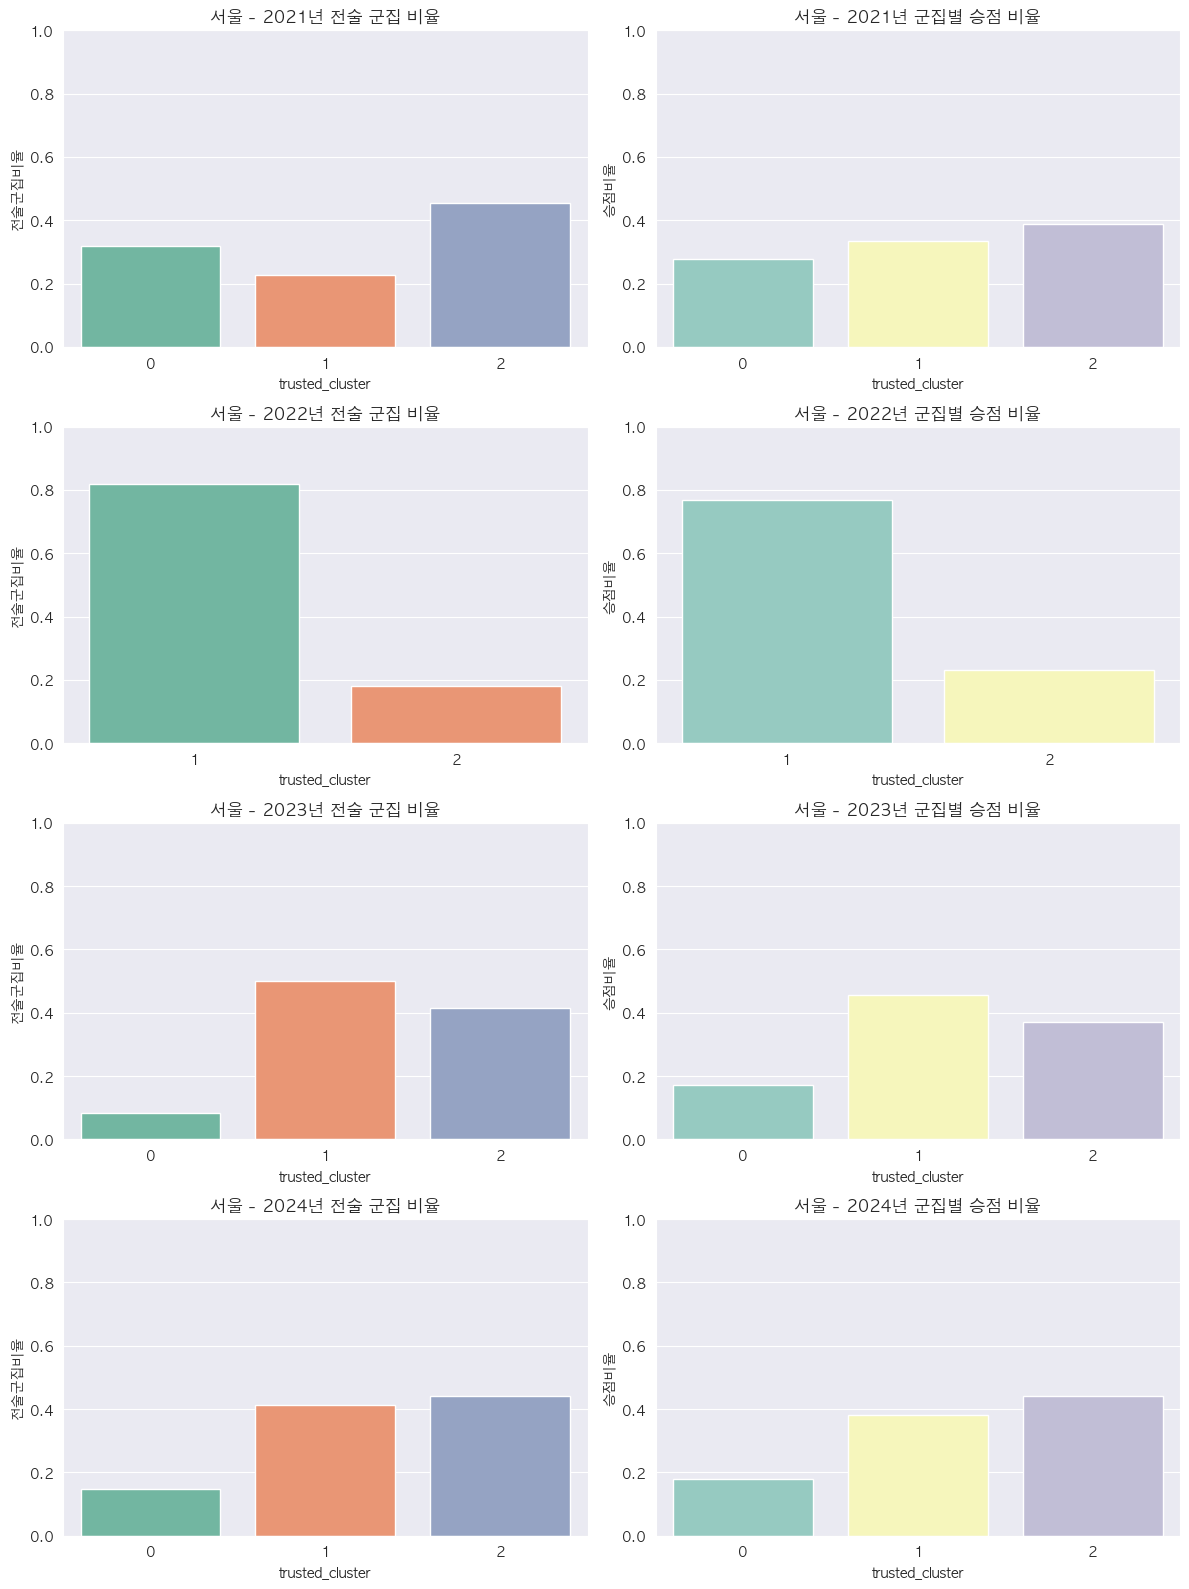

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

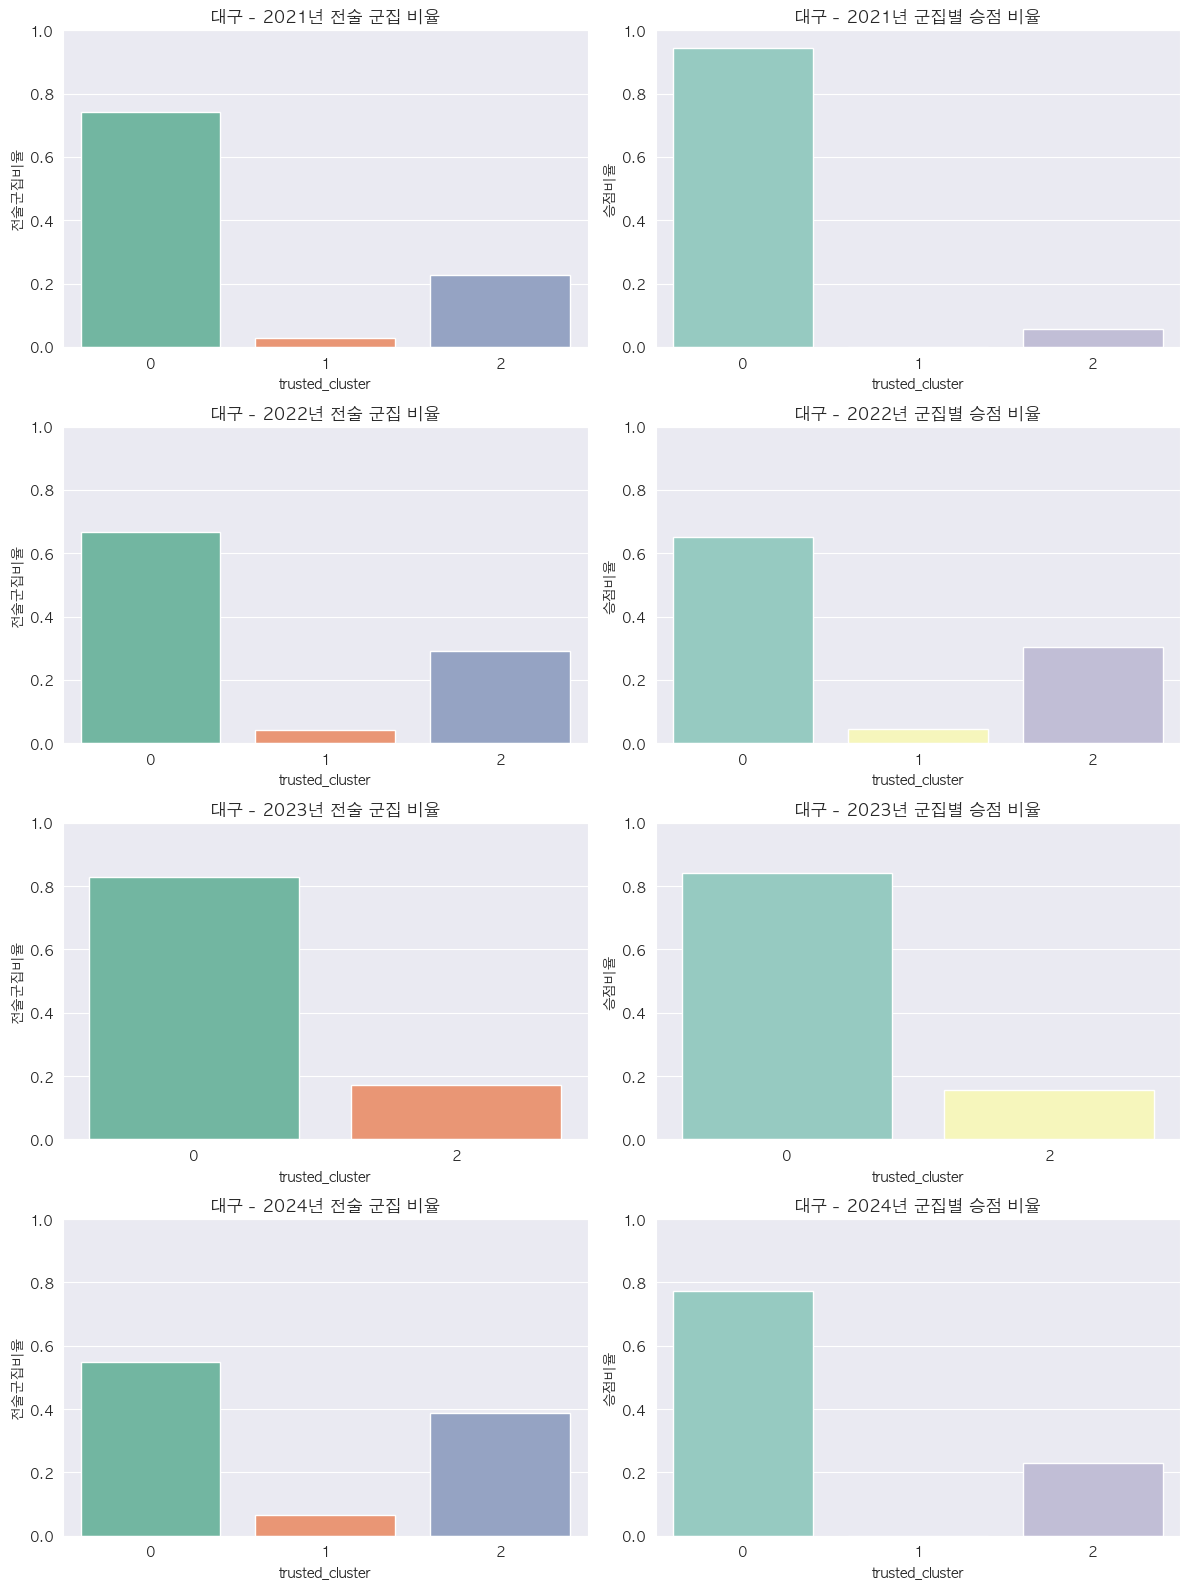

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

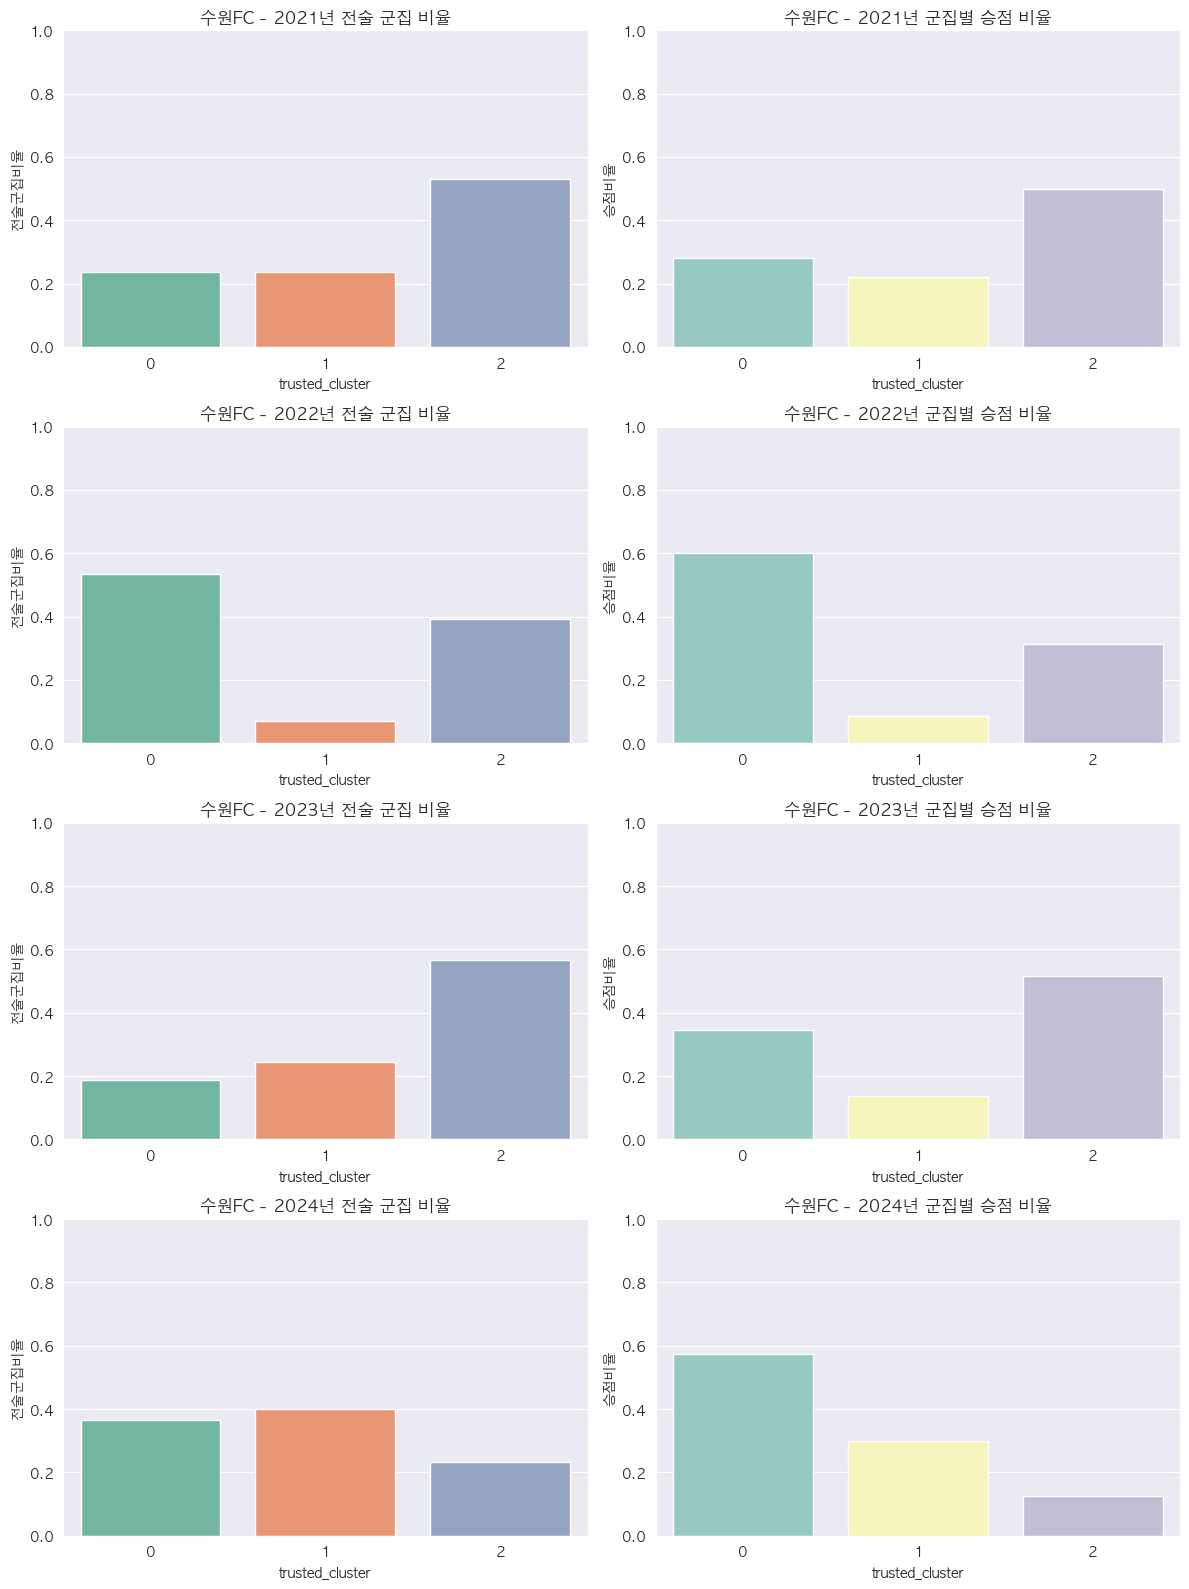

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

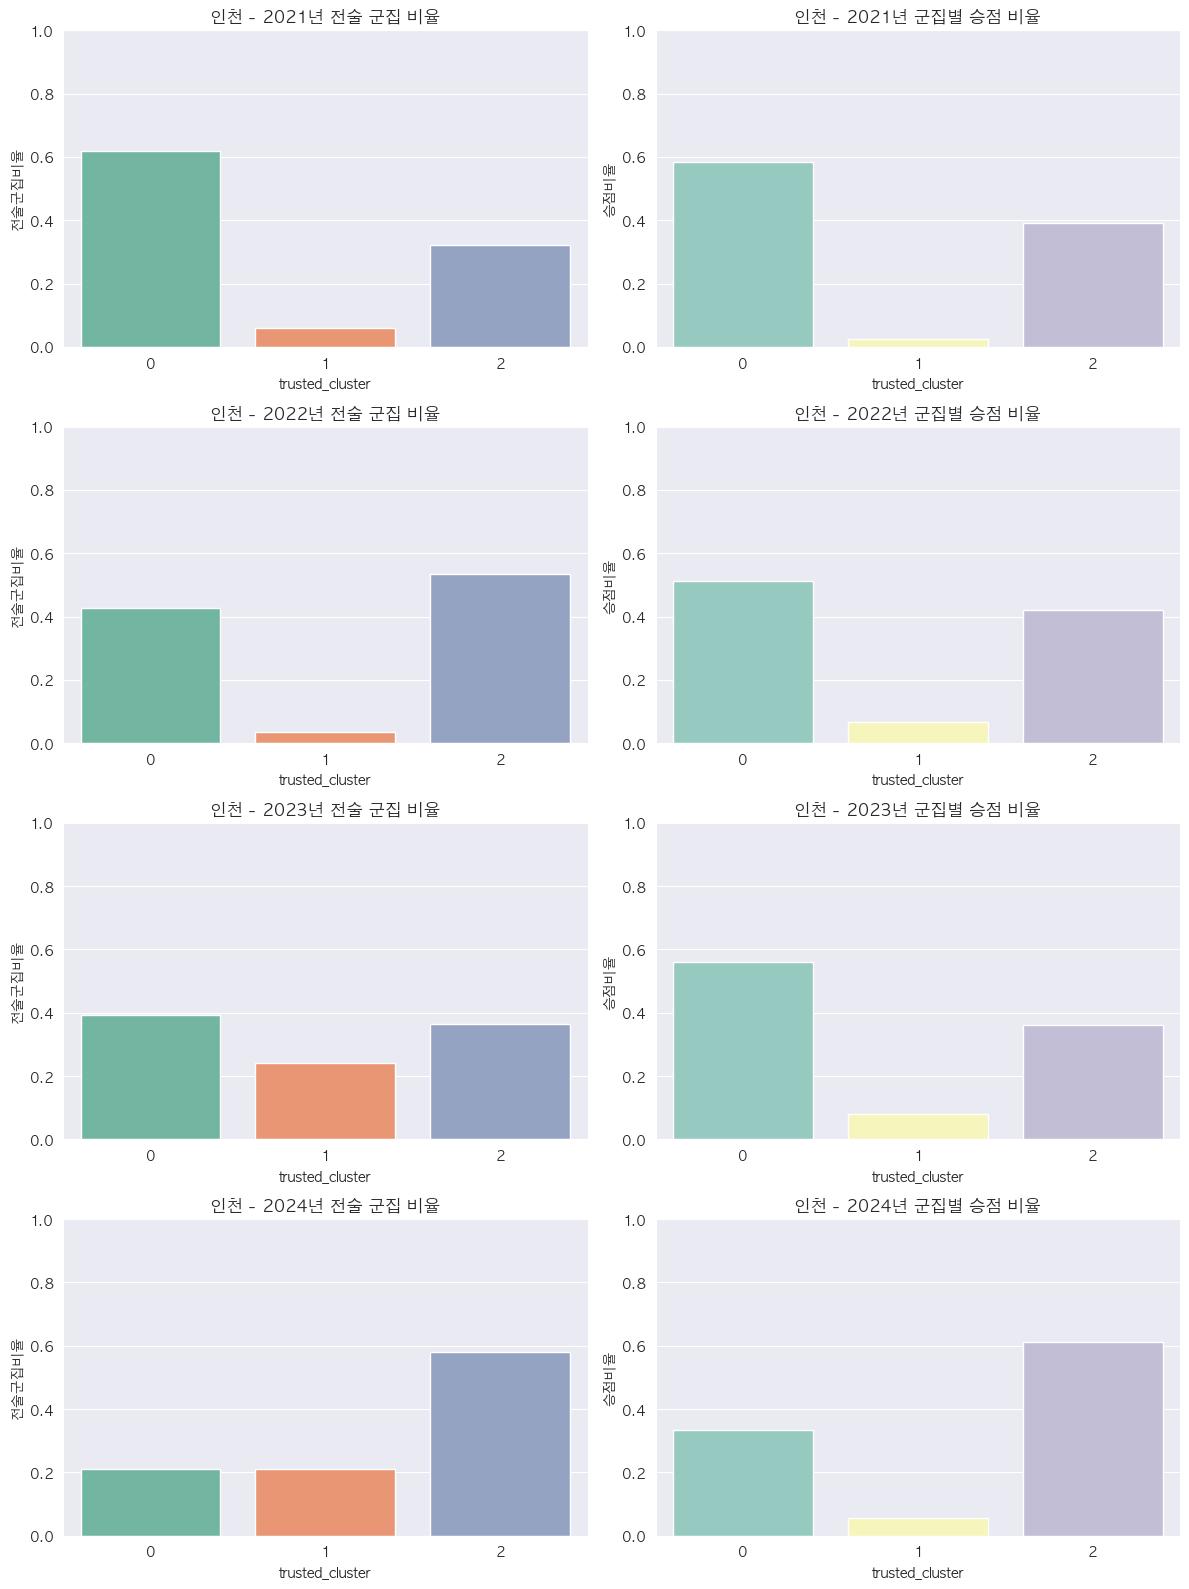

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

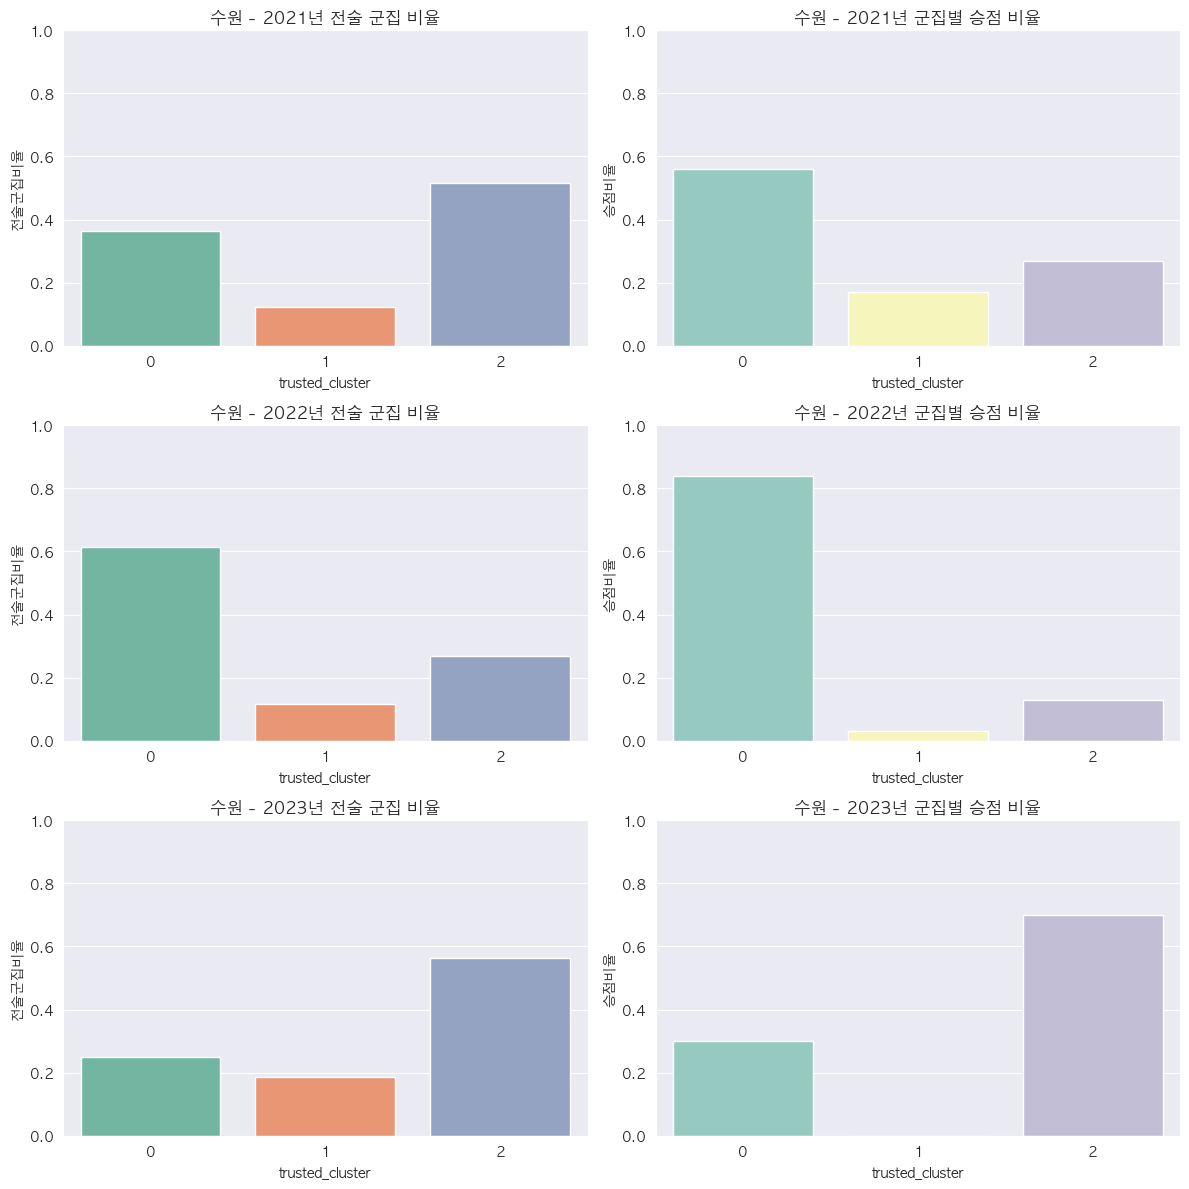

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

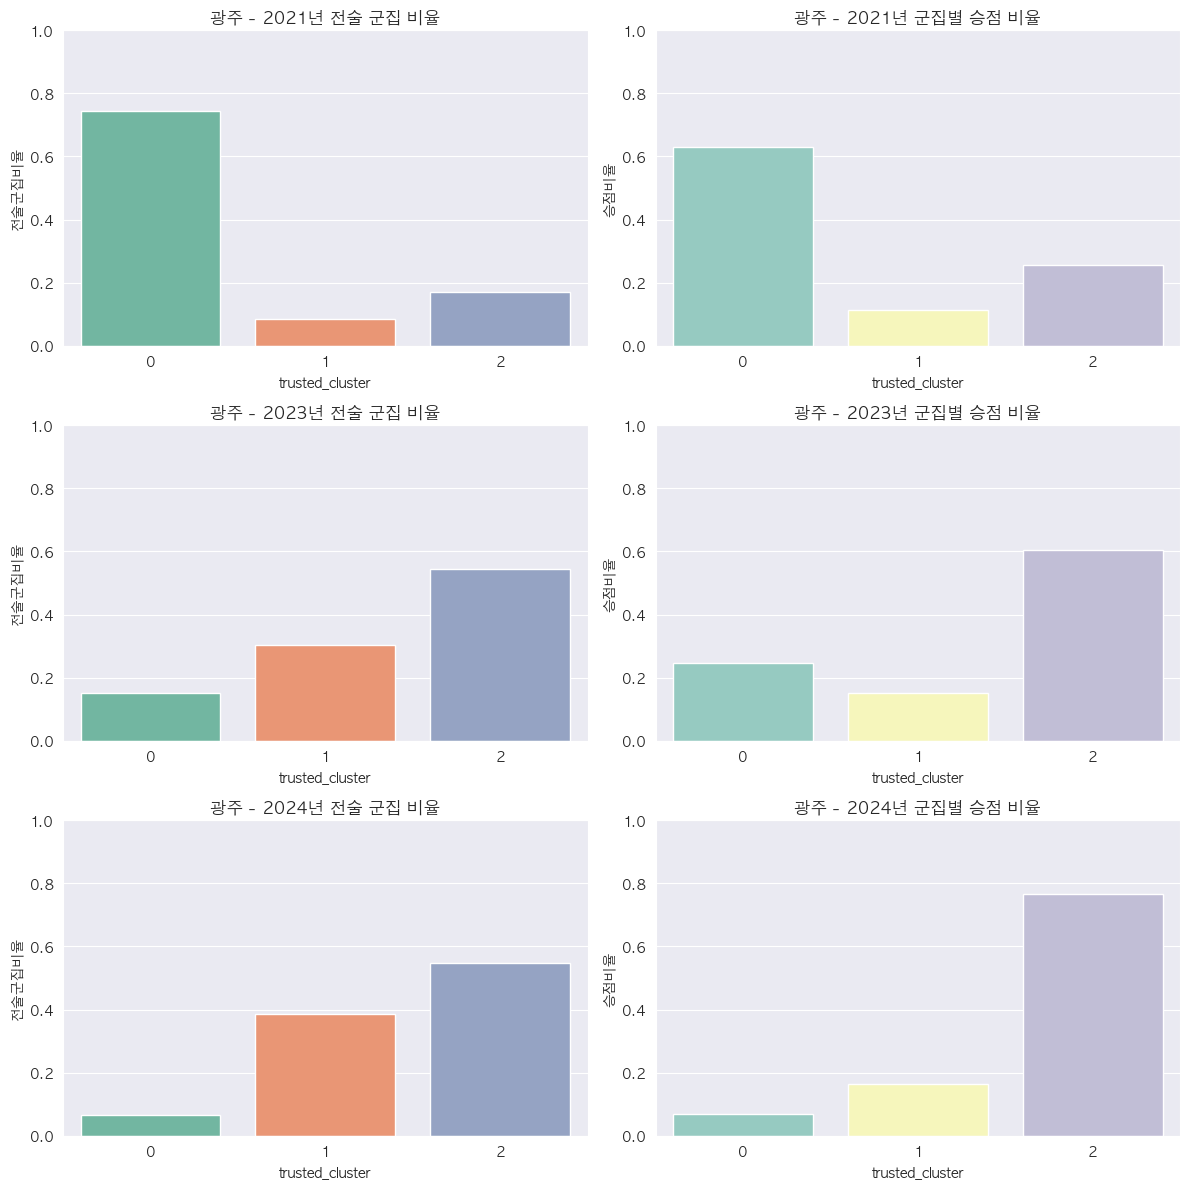

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

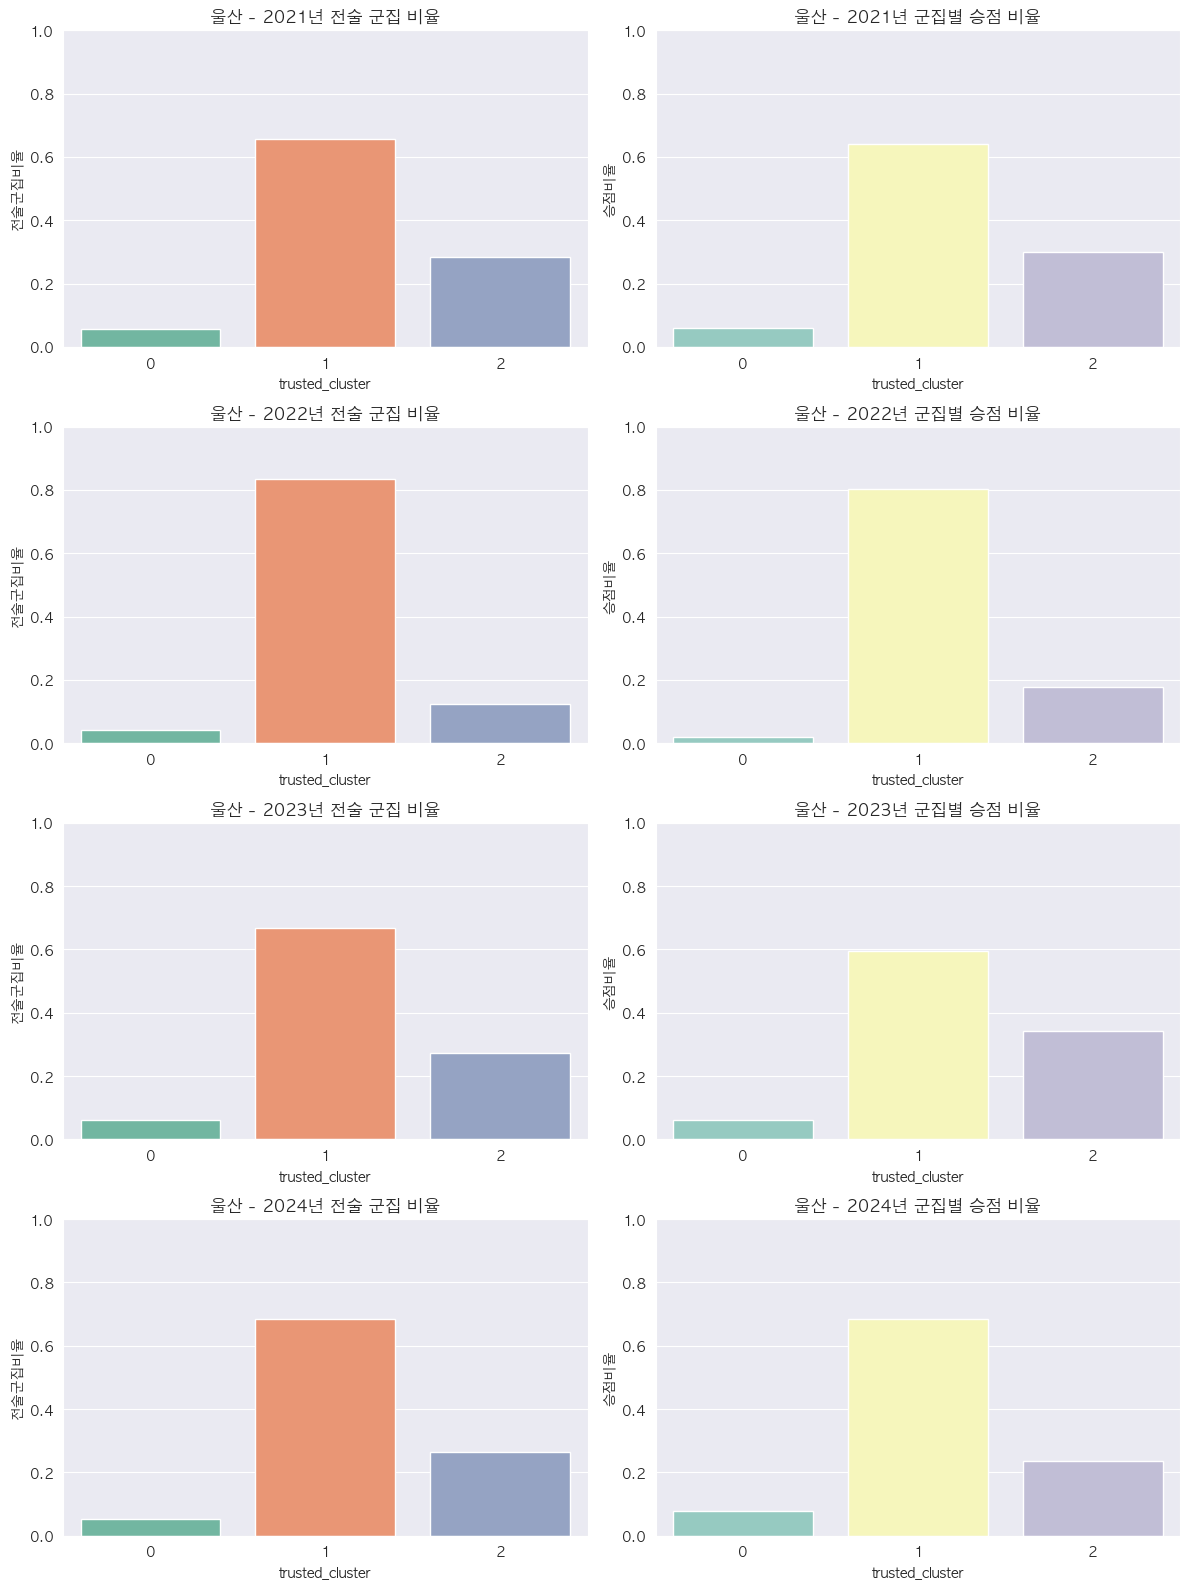

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

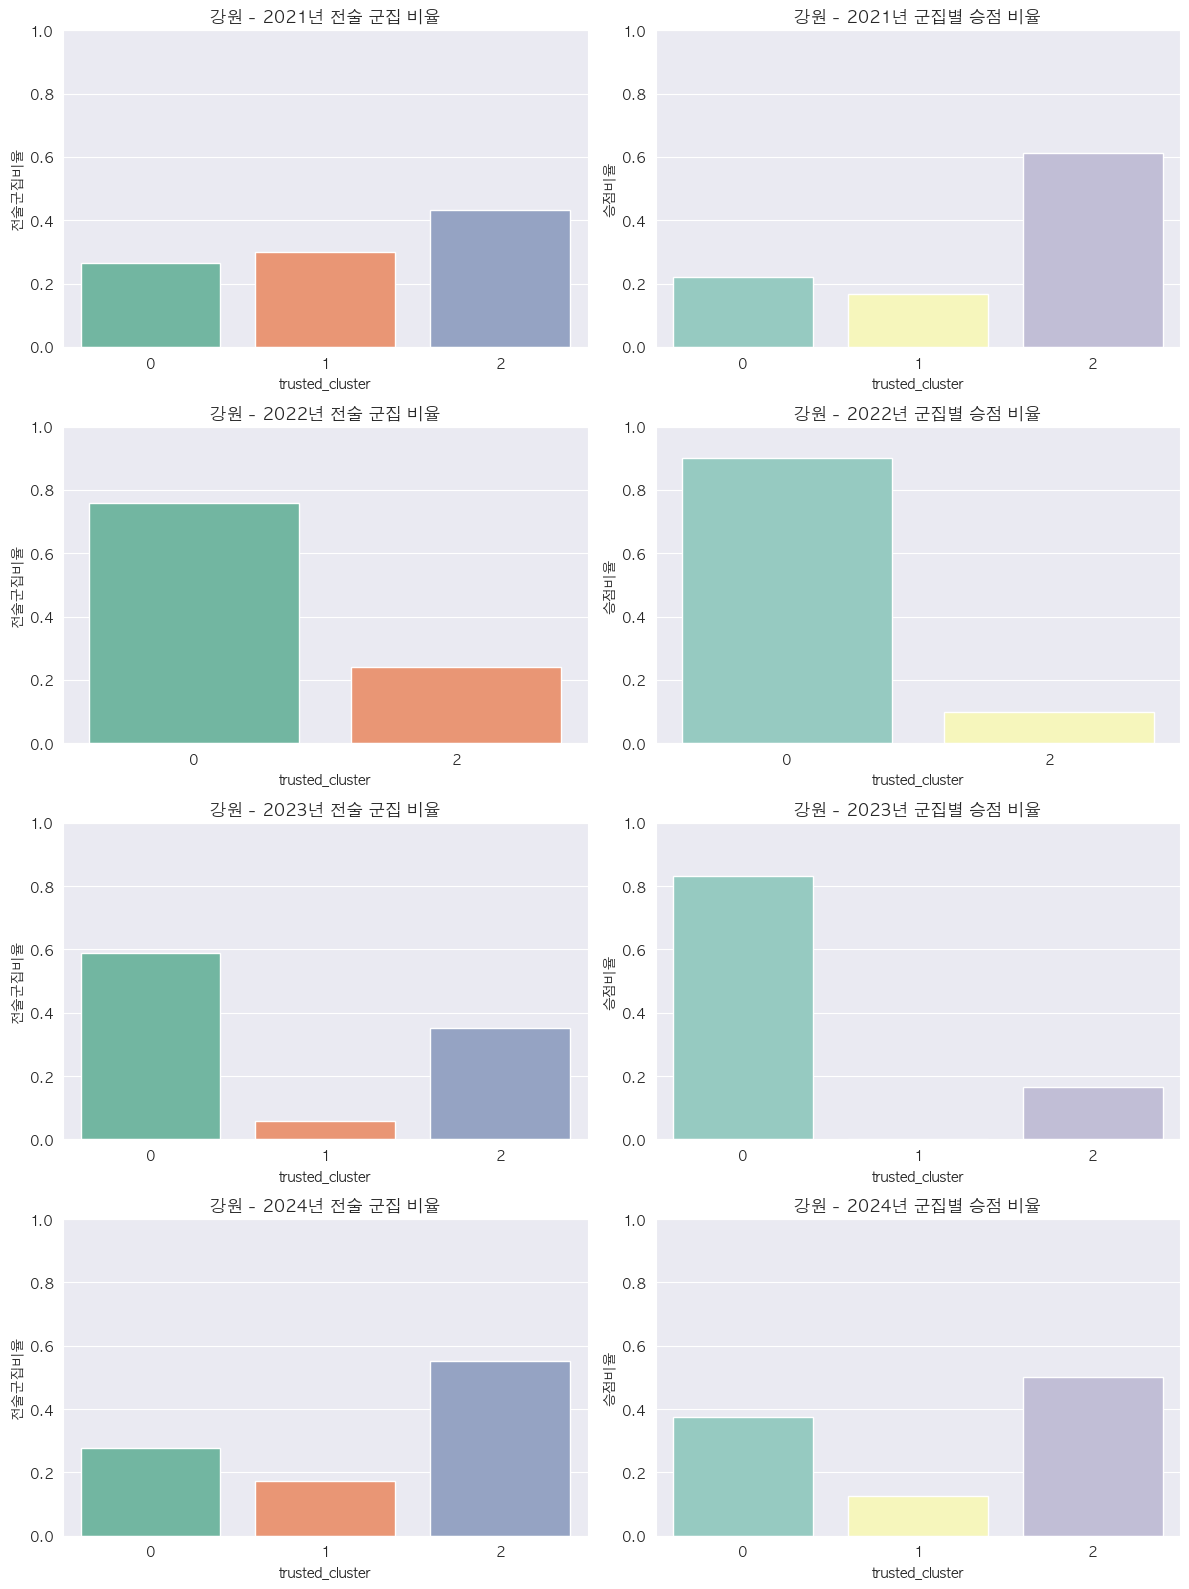

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

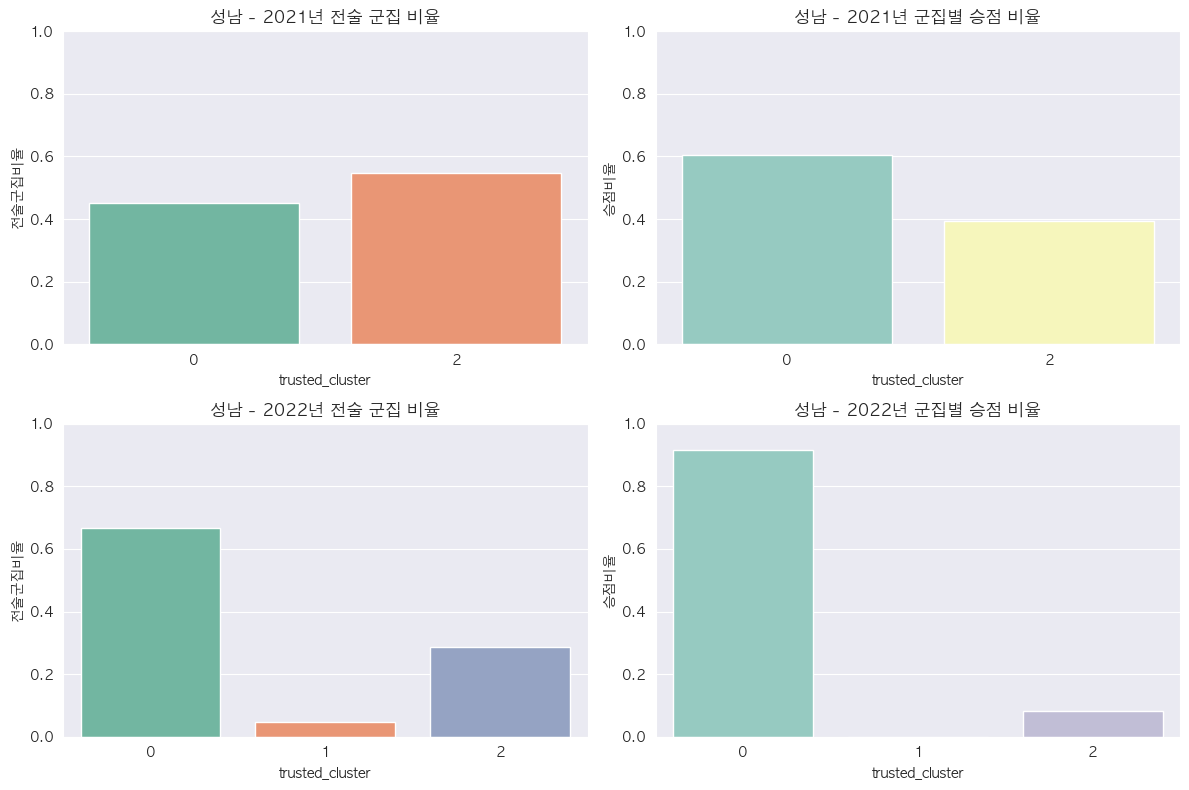

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

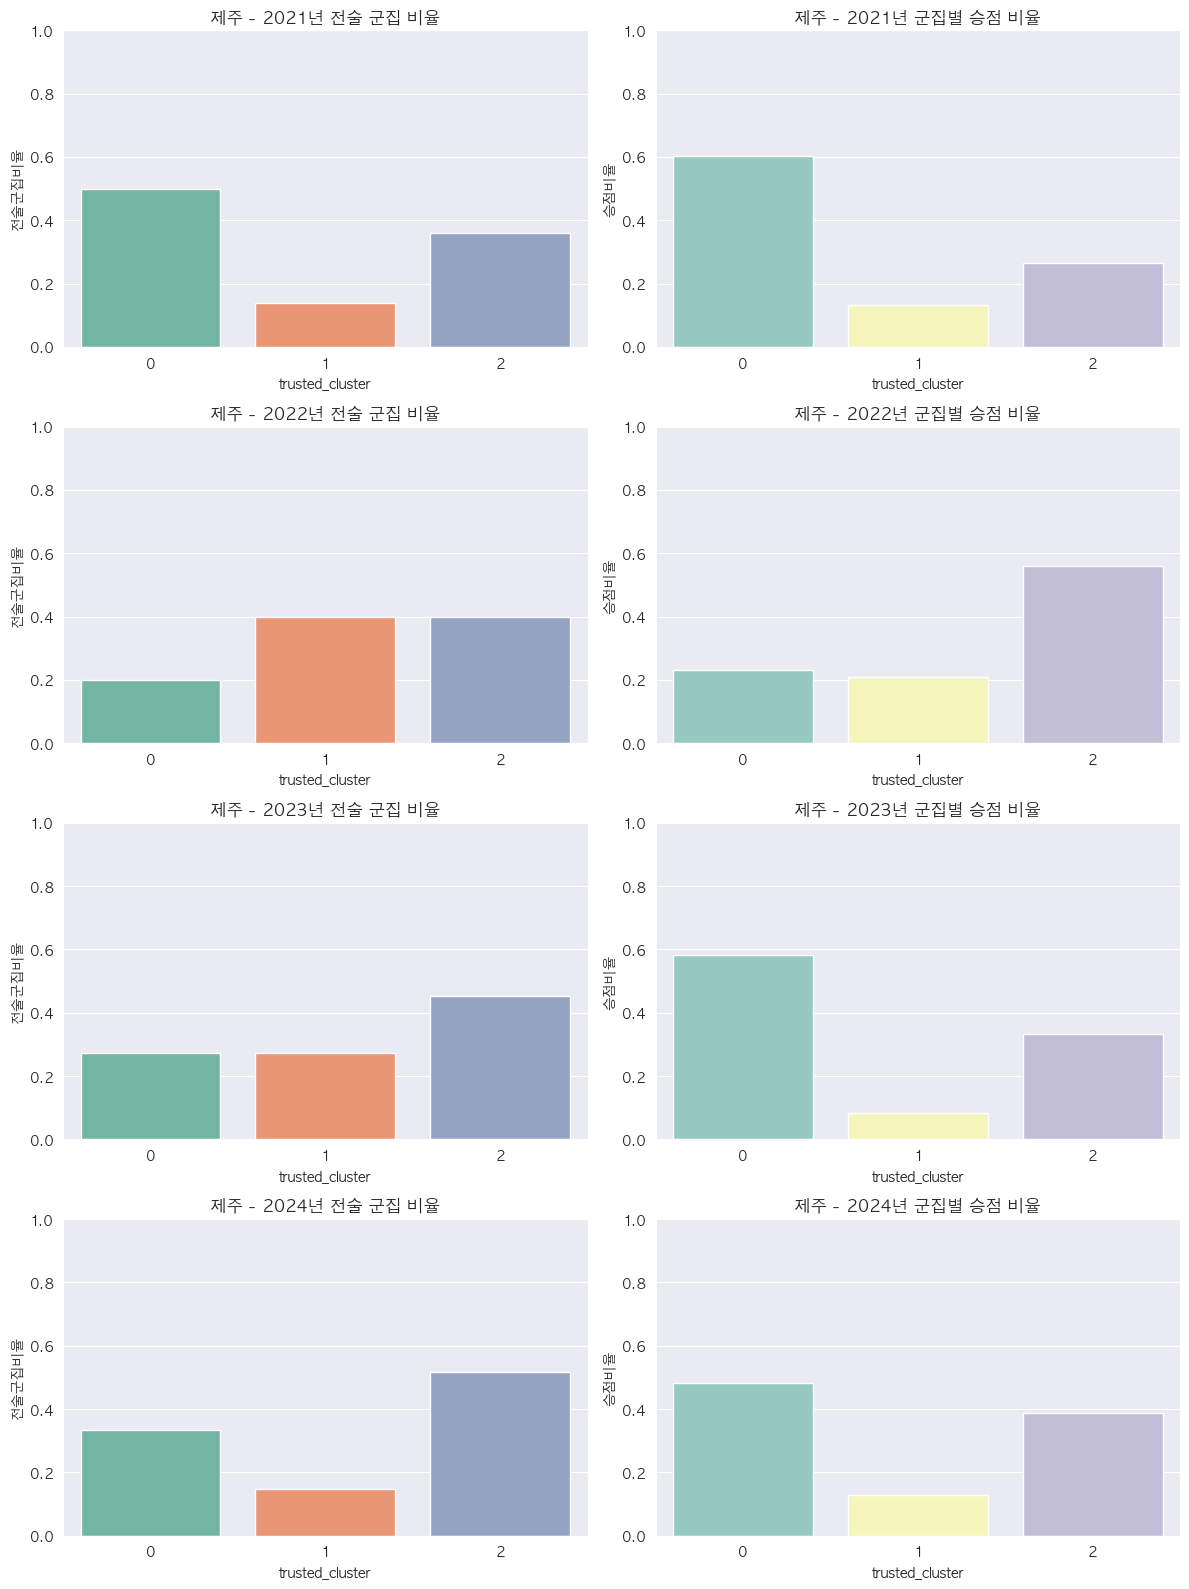

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

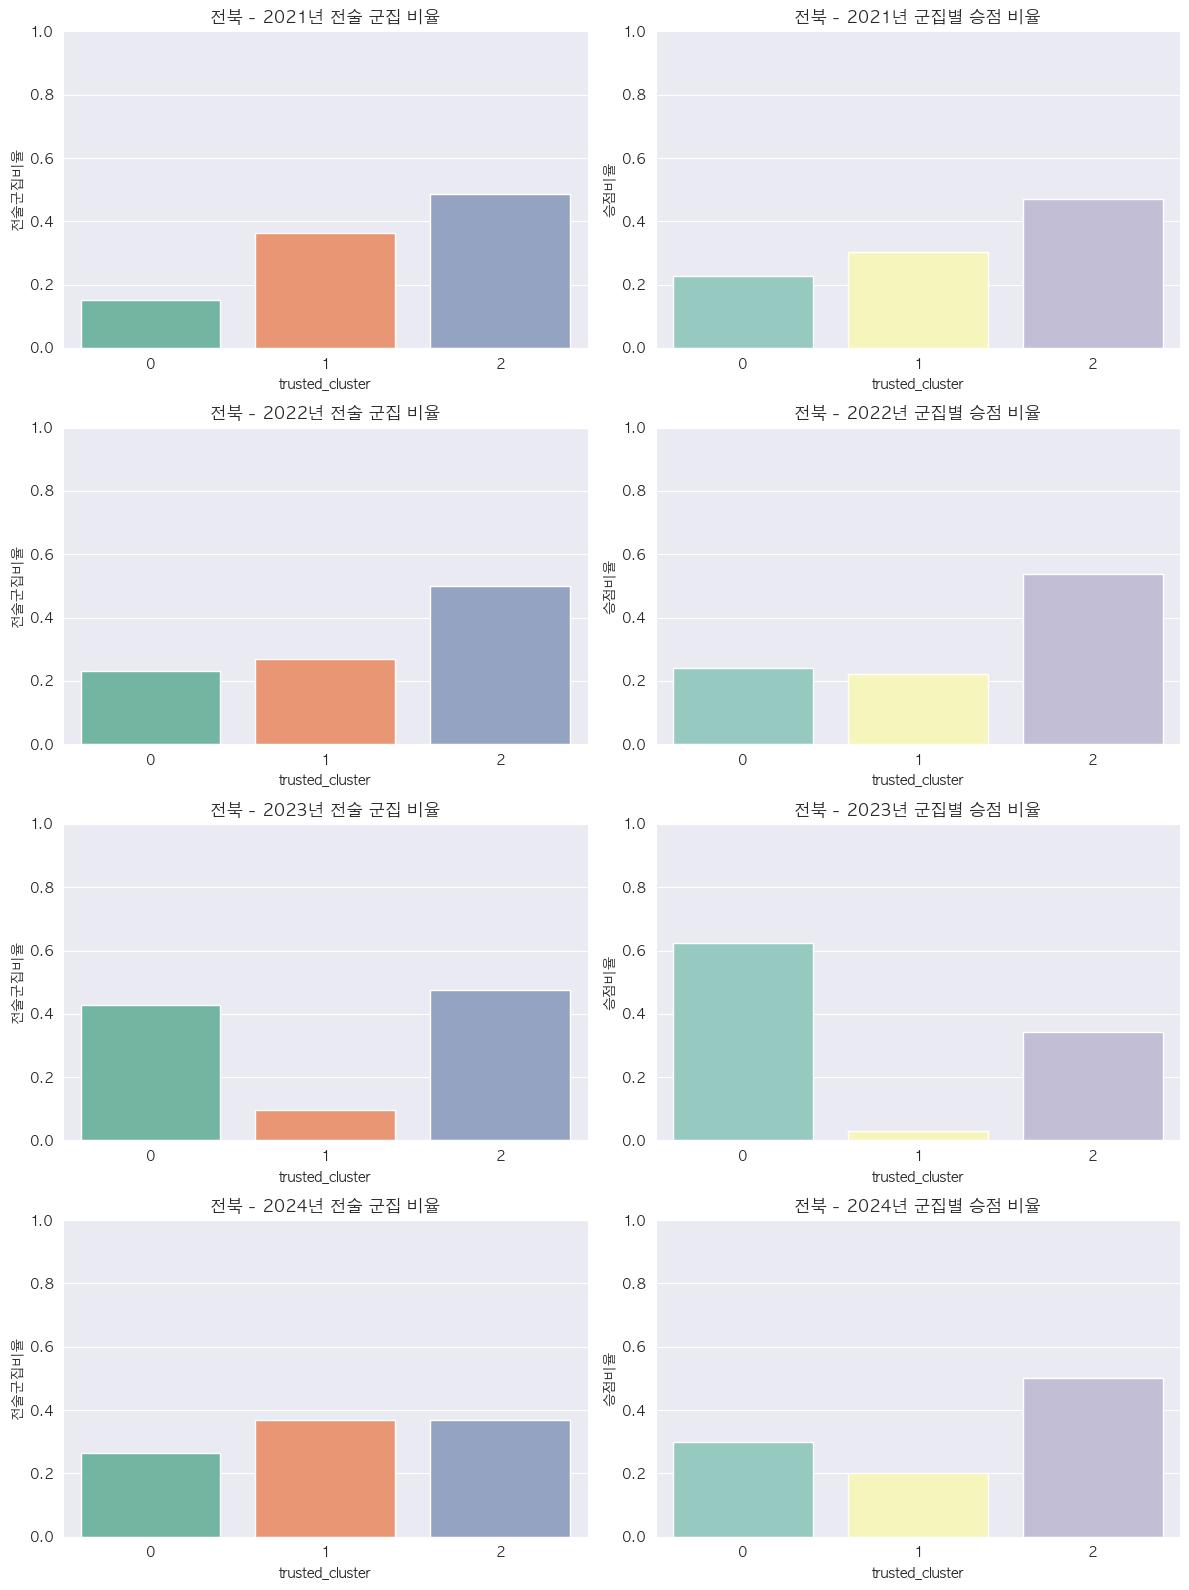

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

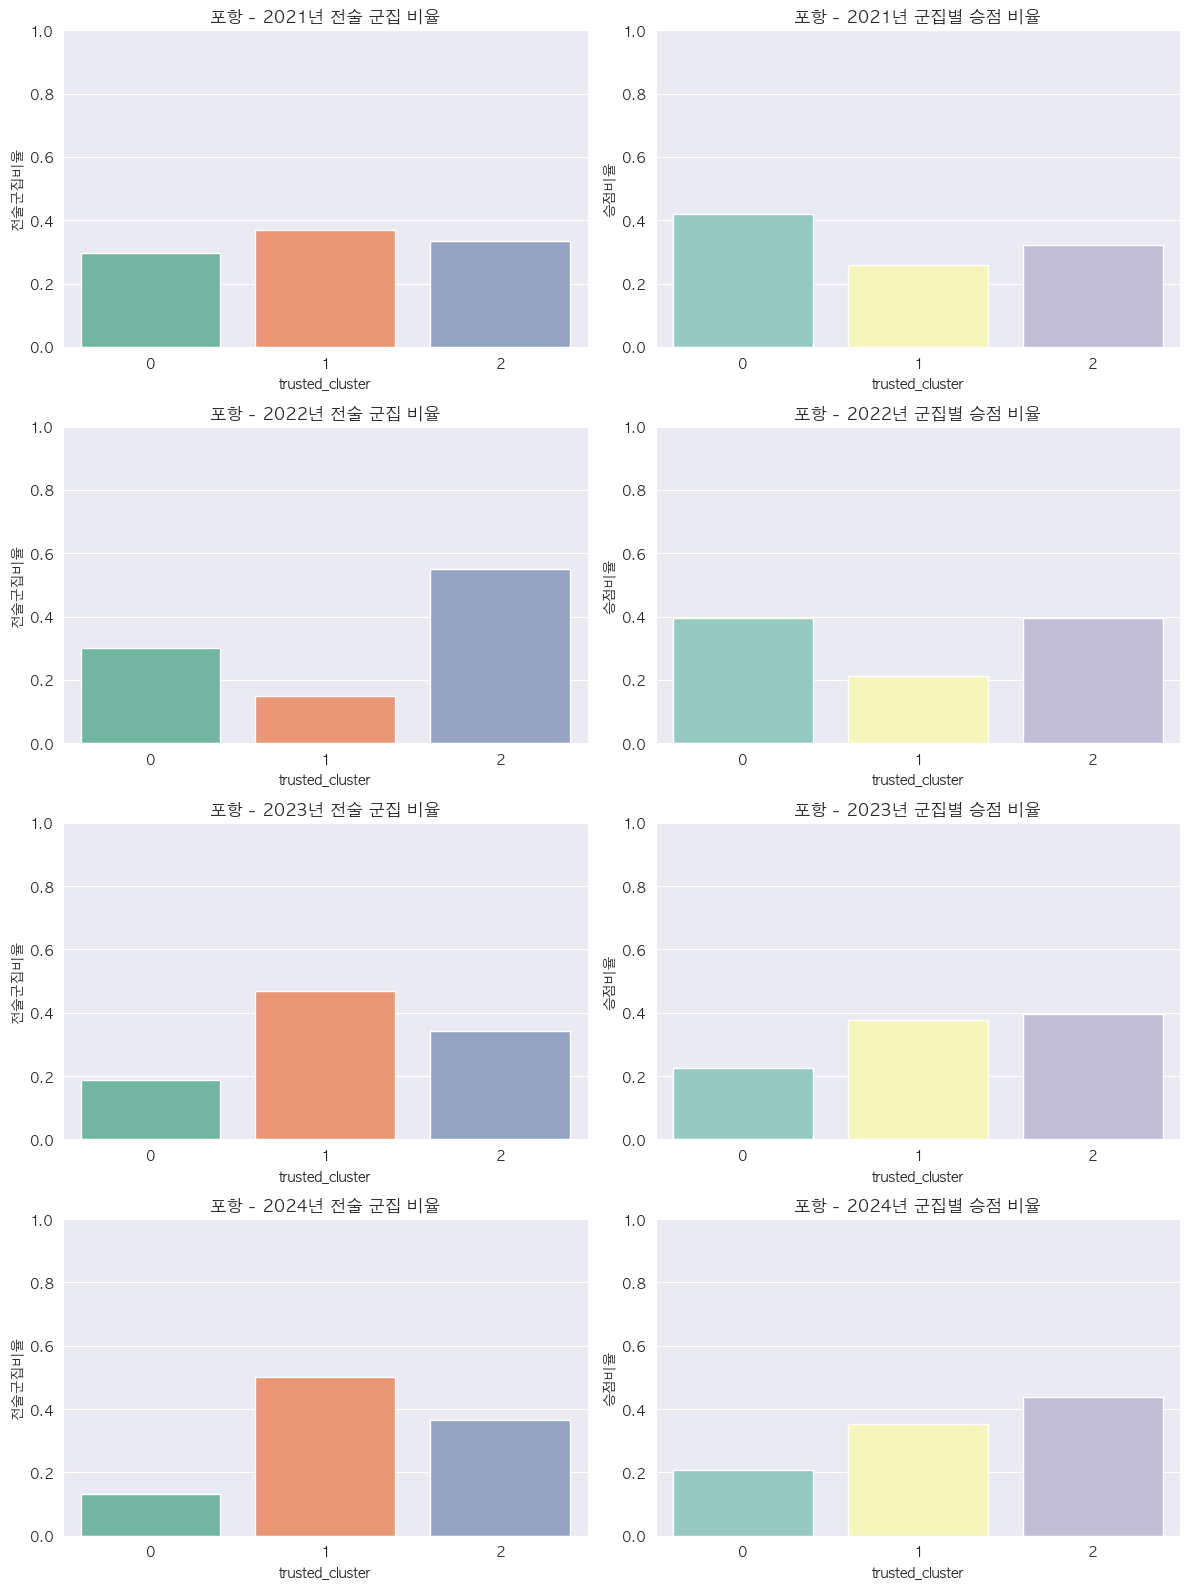

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

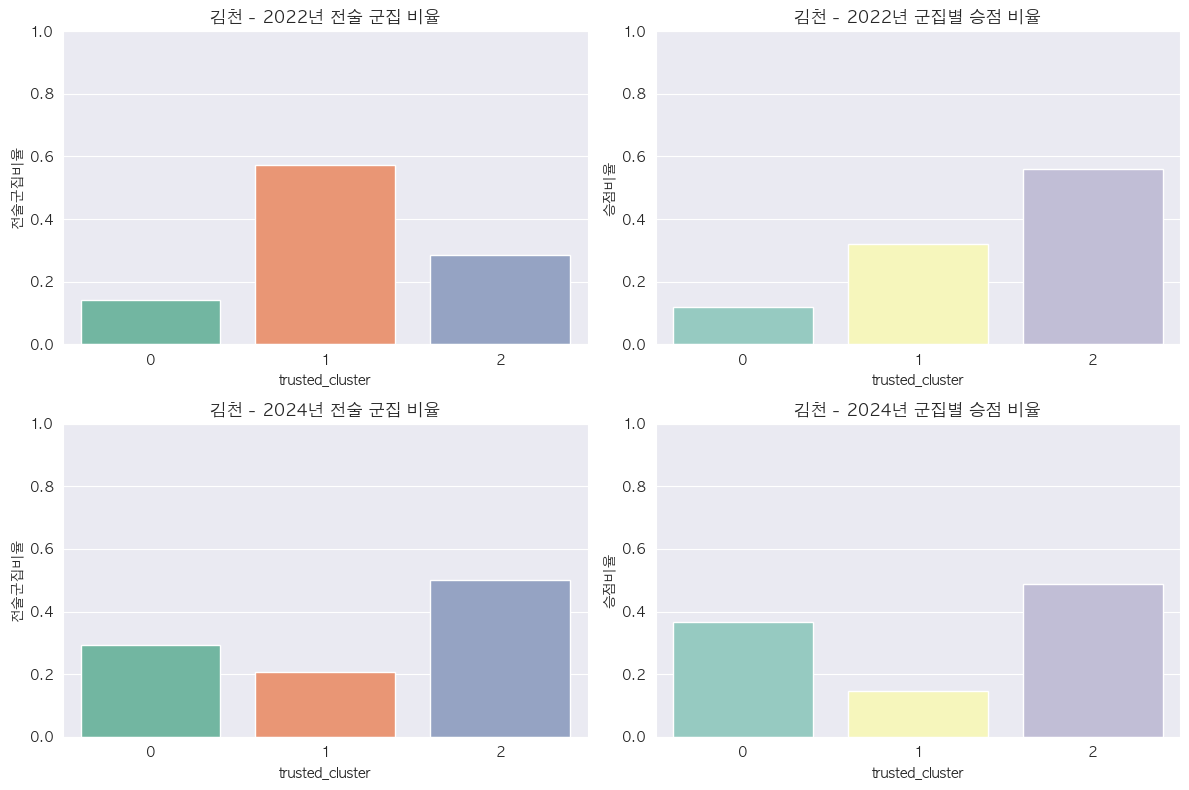

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/3028592986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

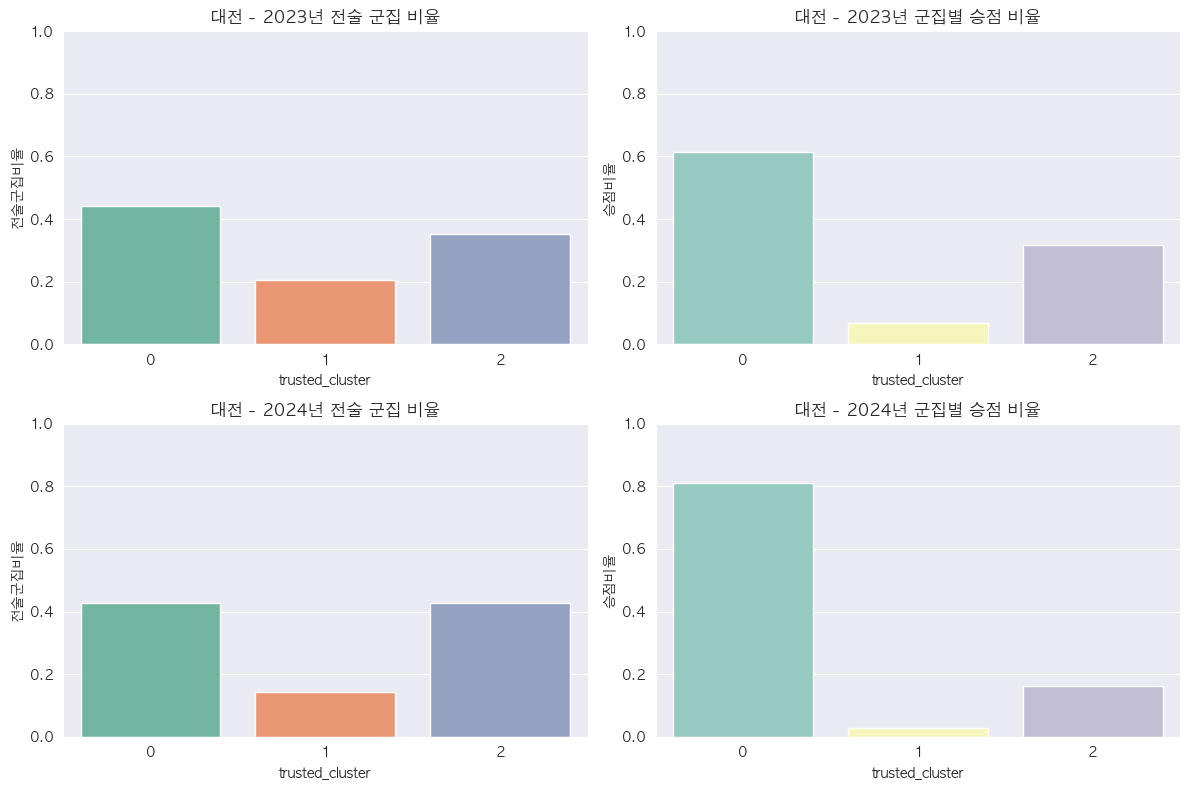

In [19]:
for team in filtered_df['Íµ¨Îã®'].unique():
    ratio_viz(team)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def ratio_viz_by_manager(team_name):
    team_df = filtered_df[filtered_df['Íµ¨Îã®'] == team_name].copy()

    # Ï†ÑÏà† Íµ∞Ïßë ÎπÑÏú®
    tactical_ratio = (
        team_df.groupby(['ÎÖÑÎèÑ', 'Í∞êÎèÖ', 'trusted_cluster'])
        .size()
        .reset_index(name='Í≤ΩÍ∏∞Ïàò')
    )
    tactical_ratio['Ï†ÑÏà†Íµ∞ÏßëÎπÑÏú®'] = tactical_ratio.groupby(['ÎÖÑÎèÑ', 'Í∞êÎèÖ'])['Í≤ΩÍ∏∞Ïàò'].transform(lambda x: x / x.sum())

    # ÏäπÏ†ê ÎπÑÏú®
    tactical_ppm = (
        team_df.groupby(['ÎÖÑÎèÑ', 'Í∞êÎèÖ', 'trusted_cluster'])['ÏäπÏ†ê']
        .sum()
        .reset_index()
    )
    tactical_ppm['ÏäπÏ†êÎπÑÏú®'] = tactical_ppm.groupby(['ÎÖÑÎèÑ', 'Í∞êÎèÖ'])['ÏäπÏ†ê'].transform(lambda x: x / x.sum())

    unique_groups = tactical_ratio[['ÎÖÑÎèÑ', 'Í∞êÎèÖ']].drop_duplicates().sort_values(['ÎÖÑÎèÑ', 'Í∞êÎèÖ'])
    num_groups = len(unique_groups)
    fig, axes = plt.subplots(num_groups, 2, figsize=(12, 4 * num_groups))

    if num_groups == 1:
        axes = [axes]

    for idx, (year, manager) in enumerate(unique_groups.values):
        # ÏôºÏ™Ω Í∑∏ÎûòÌîÑ: Ï†ÑÏà† Íµ∞Ïßë ÎπÑÏú®
        ax1 = axes[idx][0]
        plot_df_ratio = tactical_ratio[(tactical_ratio['ÎÖÑÎèÑ'] == year) & (tactical_ratio['Í∞êÎèÖ'] == manager)]
        sns.barplot(
            data=plot_df_ratio,
            x='trusted_cluster', y='Ï†ÑÏà†Íµ∞ÏßëÎπÑÏú®', ax=ax1, palette='Set2'
        )
        ax1.set_title(f'{team_name} - {year}ÎÖÑ {manager} Í∞êÎèÖÏùò Ï†ÑÏà† Íµ∞Ïßë ÎπÑÏú®')
        ax1.set_ylim(0, 1)

        # ÏàòÏπò ÌëúÏãú (Í≤ΩÍ∏∞Ïàò)
        for i, row in plot_df_ratio.iterrows():
            ax1.text(
                x=i - plot_df_ratio.index[0],  # Ïù∏Îç±Ïä§ Î≥¥Ï†ï
                y=row['Ï†ÑÏà†Íµ∞ÏßëÎπÑÏú®'] + 0.02,
                s=f"{int(row['Í≤ΩÍ∏∞Ïàò'])}Í≤ΩÍ∏∞",
                ha='center', va='bottom', fontsize=9
            )

        # Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ: ÏäπÏ†ê ÎπÑÏú®
        ax2 = axes[idx][1]
        plot_df_ppm = tactical_ppm[(tactical_ppm['ÎÖÑÎèÑ'] == year) & (tactical_ppm['Í∞êÎèÖ'] == manager)]
        sns.barplot(
            data=plot_df_ppm,
            x='trusted_cluster', y='ÏäπÏ†êÎπÑÏú®', ax=ax2, palette='Set3'
        )
        ax2.set_title(f'{team_name} - {year}ÎÖÑ {manager} Í∞êÎèÖÏùò Íµ∞ÏßëÎ≥Ñ ÏäπÏ†ê Í∏∞Ïó¨')
        ax2.set_ylim(0, 1)

        # ÏàòÏπò ÌëúÏãú (ÏäπÏ†ê)
        for i, row in plot_df_ppm.iterrows():
            ax2.text(
                x=i - plot_df_ppm.index[0],
                y=row['ÏäπÏ†êÎπÑÏú®'] + 0.02,
                s=f"{row['ÏäπÏ†ê']}Ï†ê",
                ha='center', va='bottom', fontsize=9
            )

    plt.tight_layout()
    plt.show()


/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

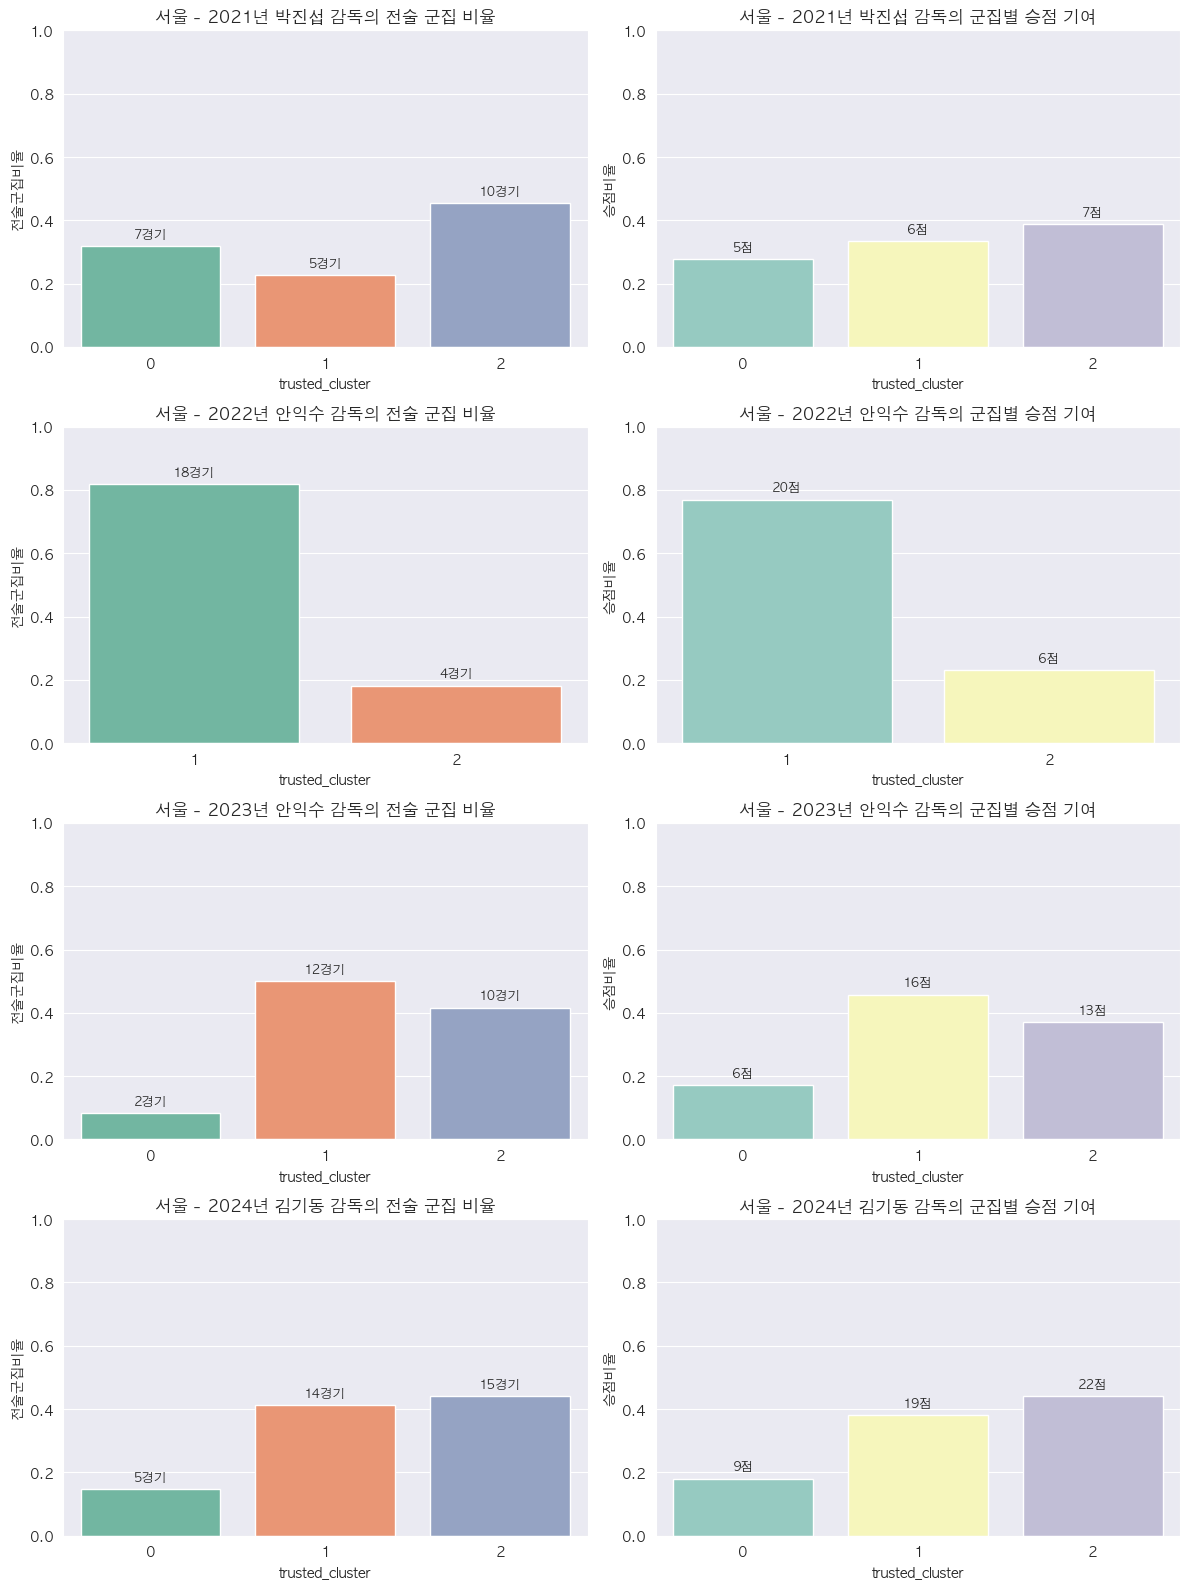

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

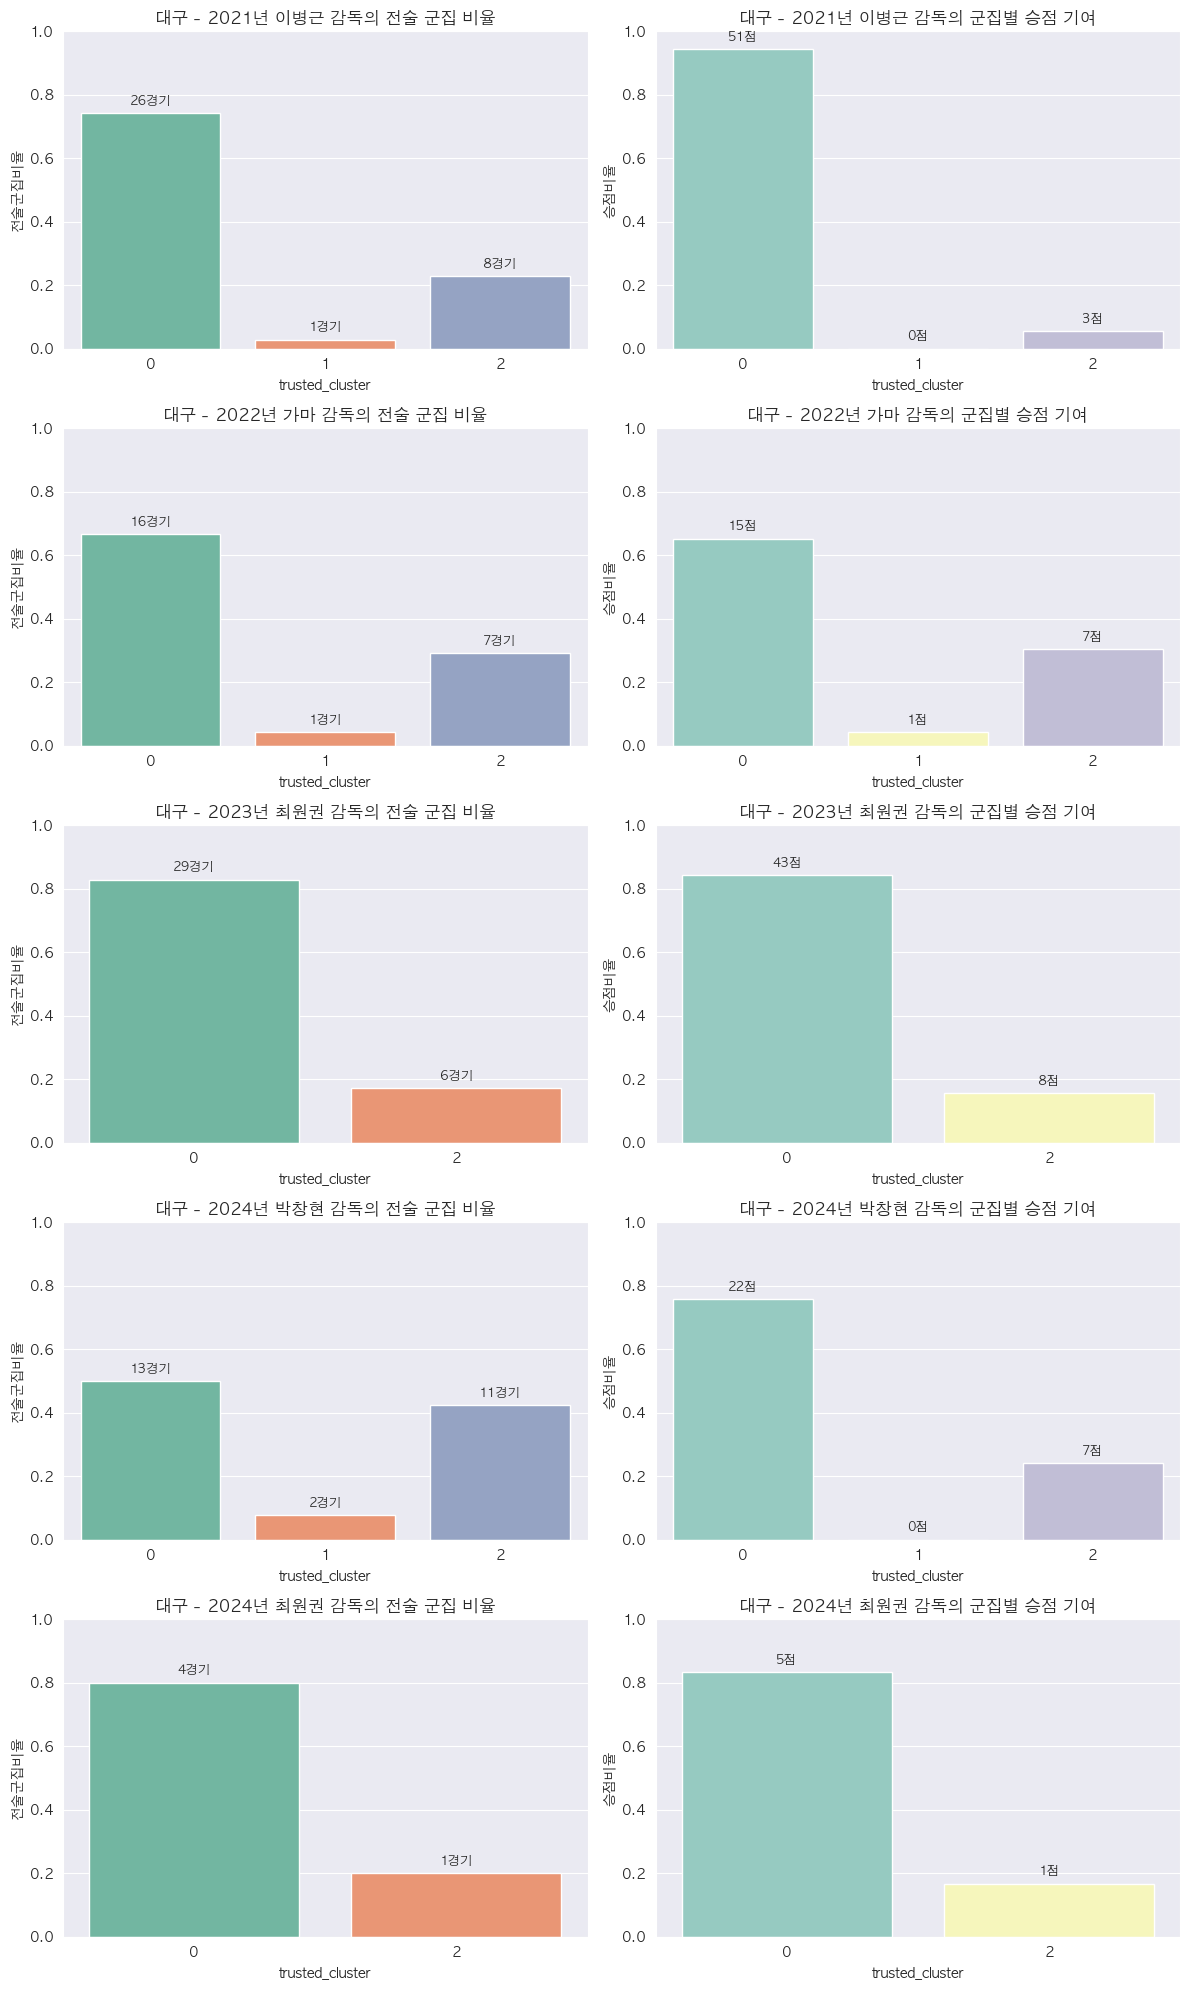

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

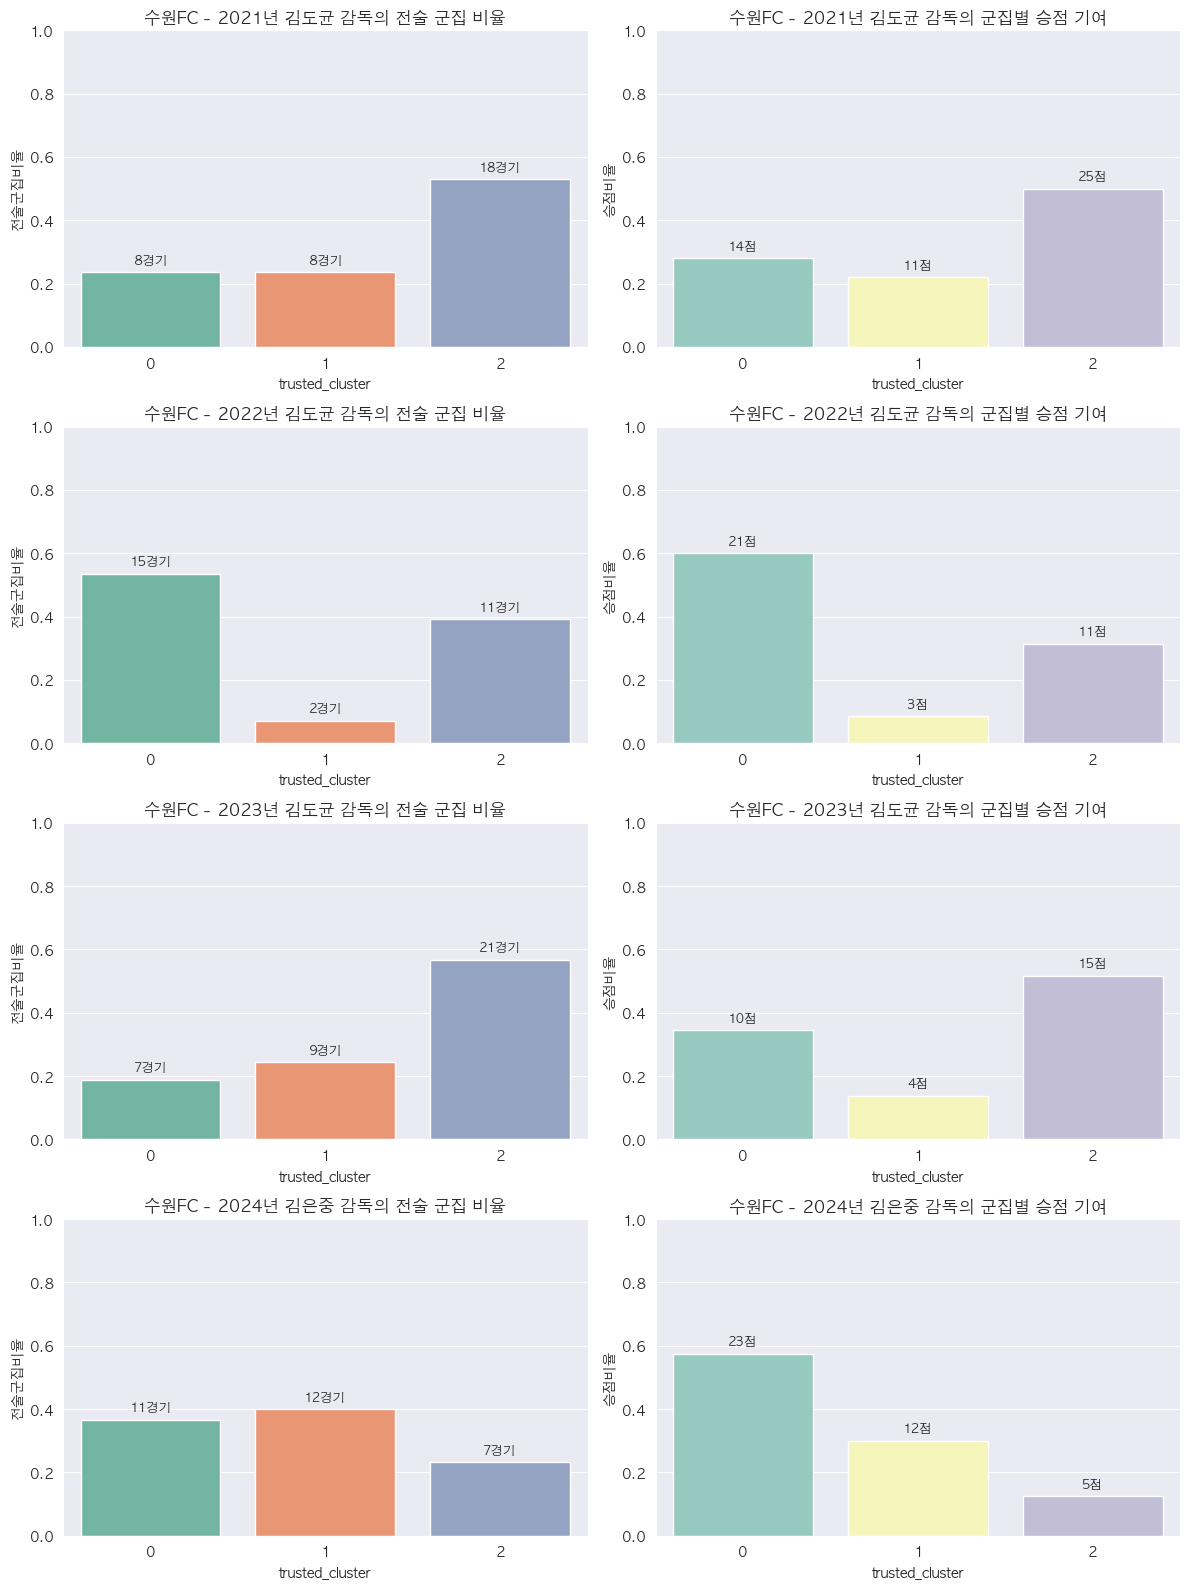

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

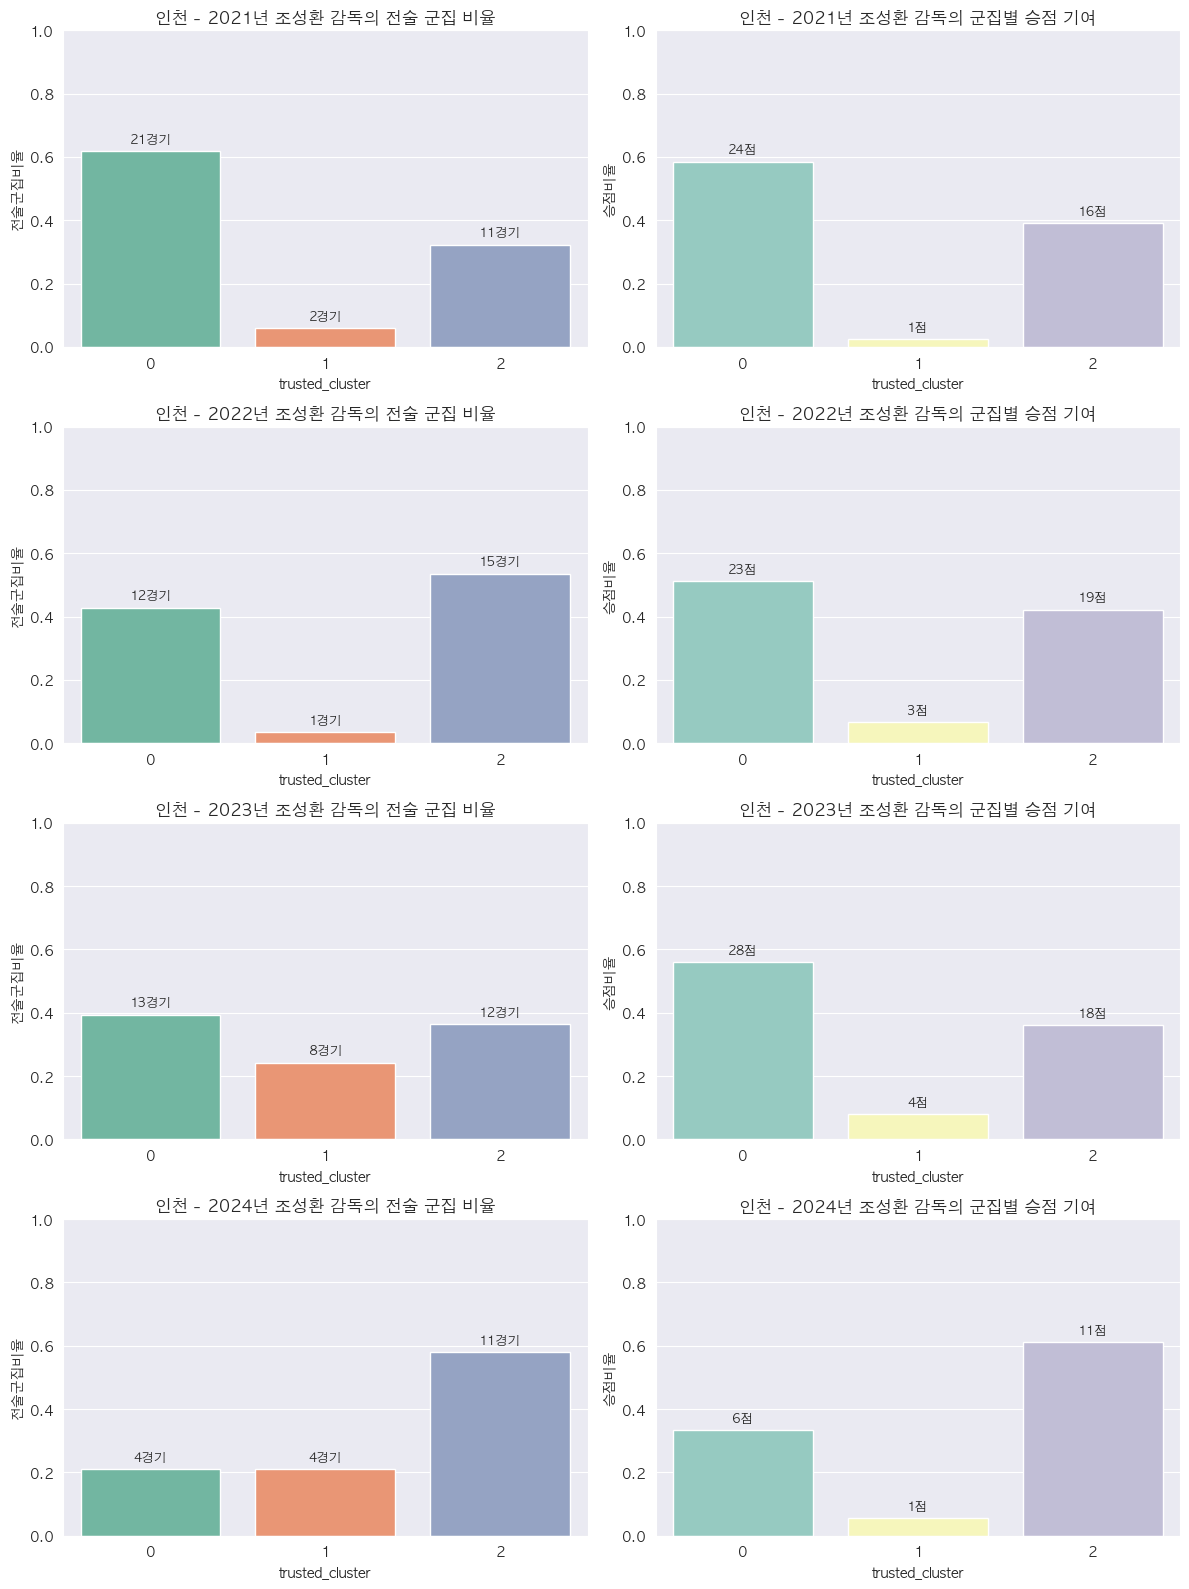

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

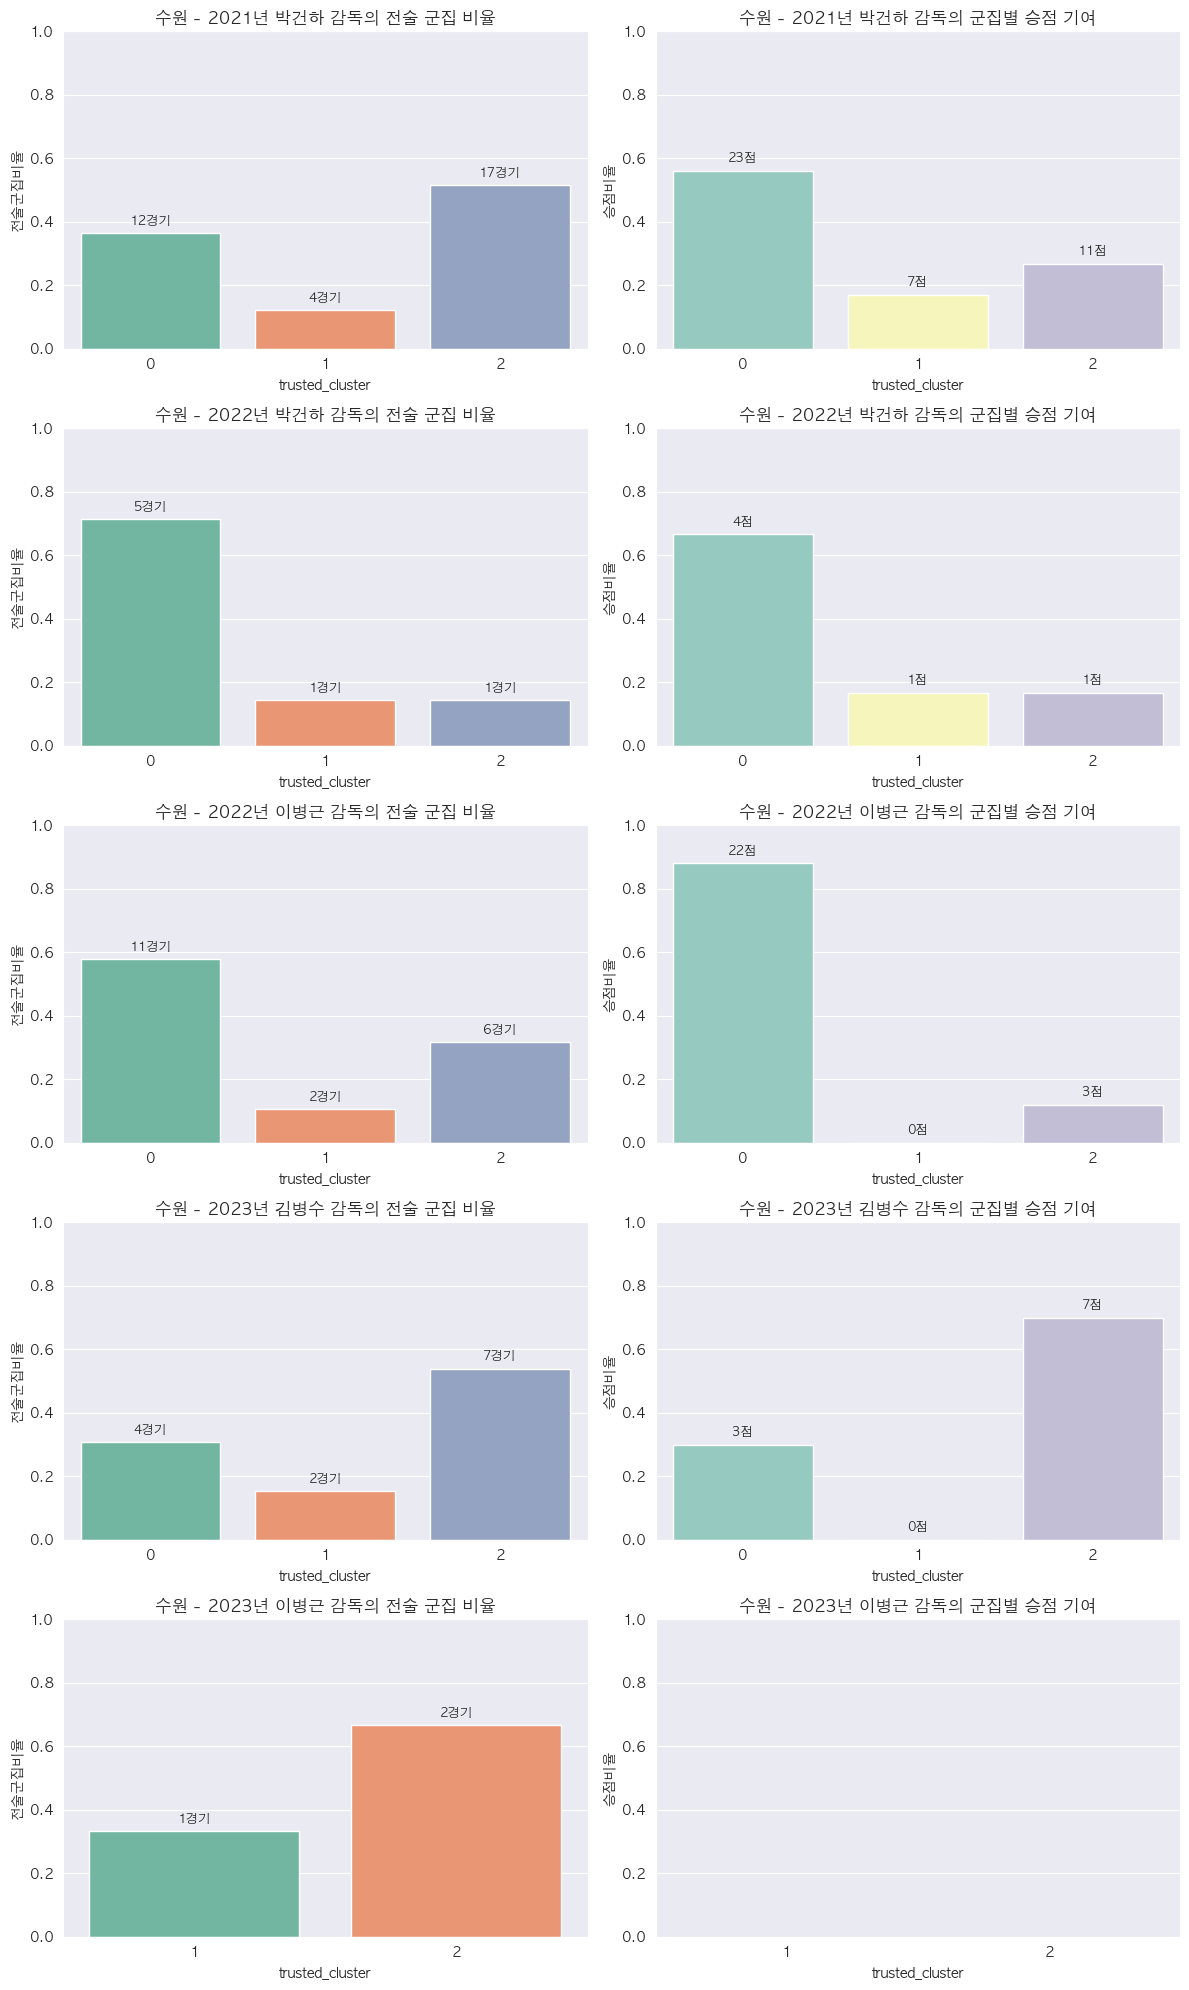

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

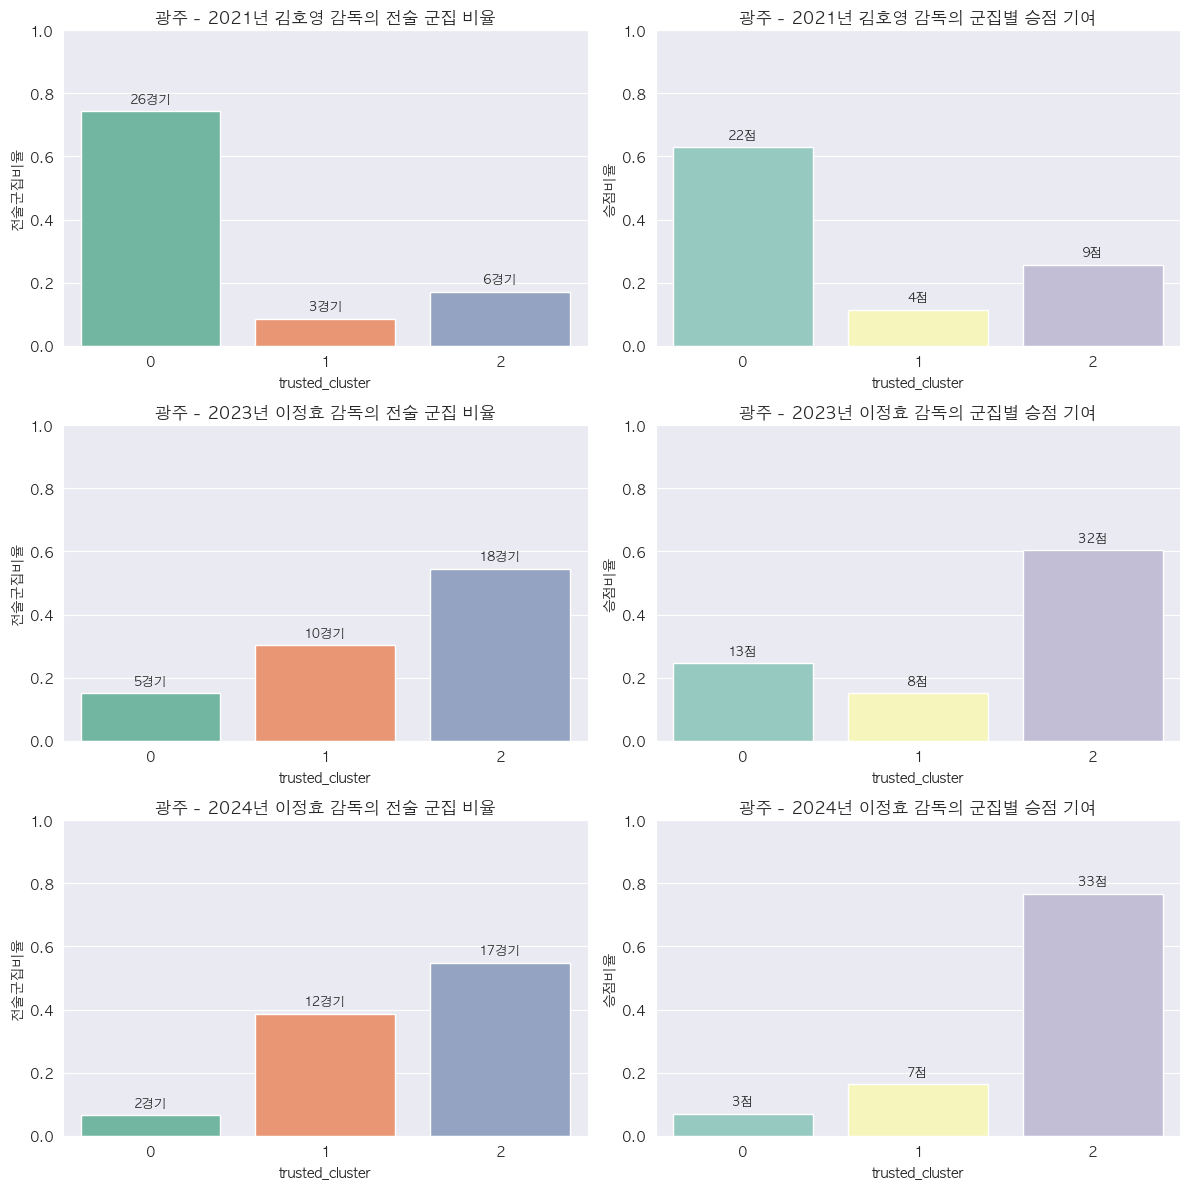

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

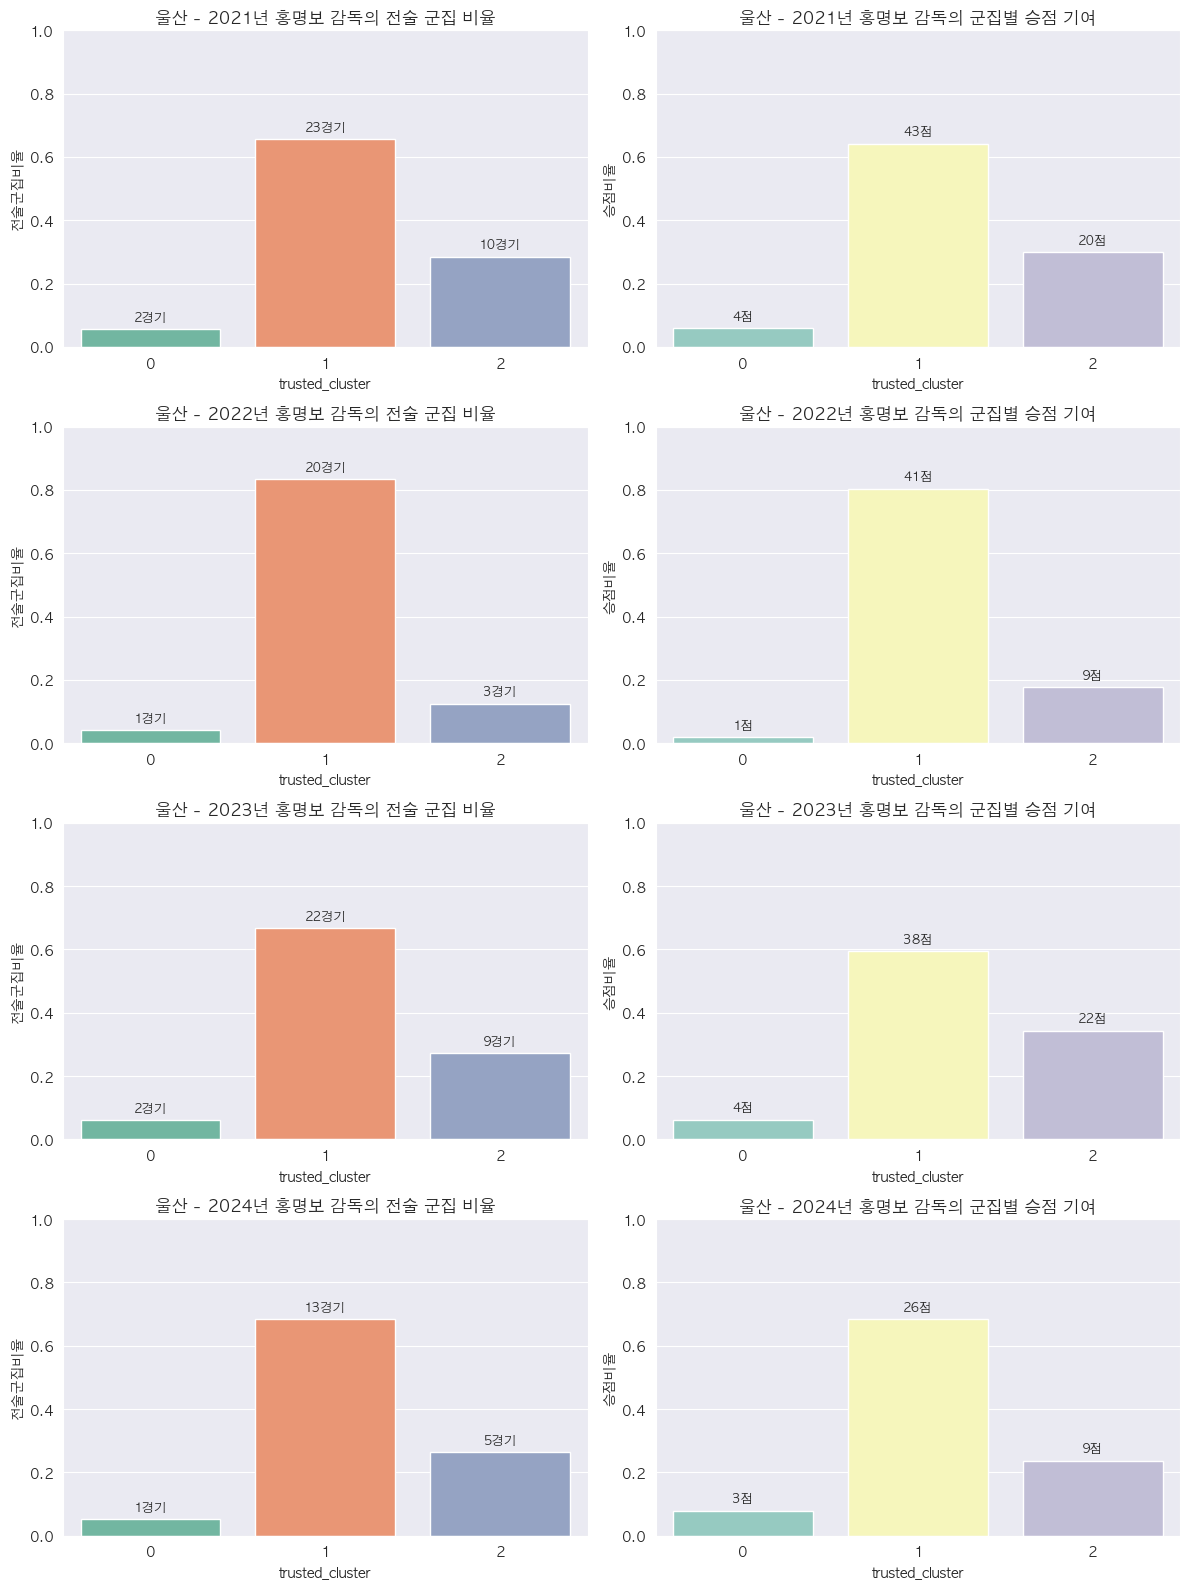

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

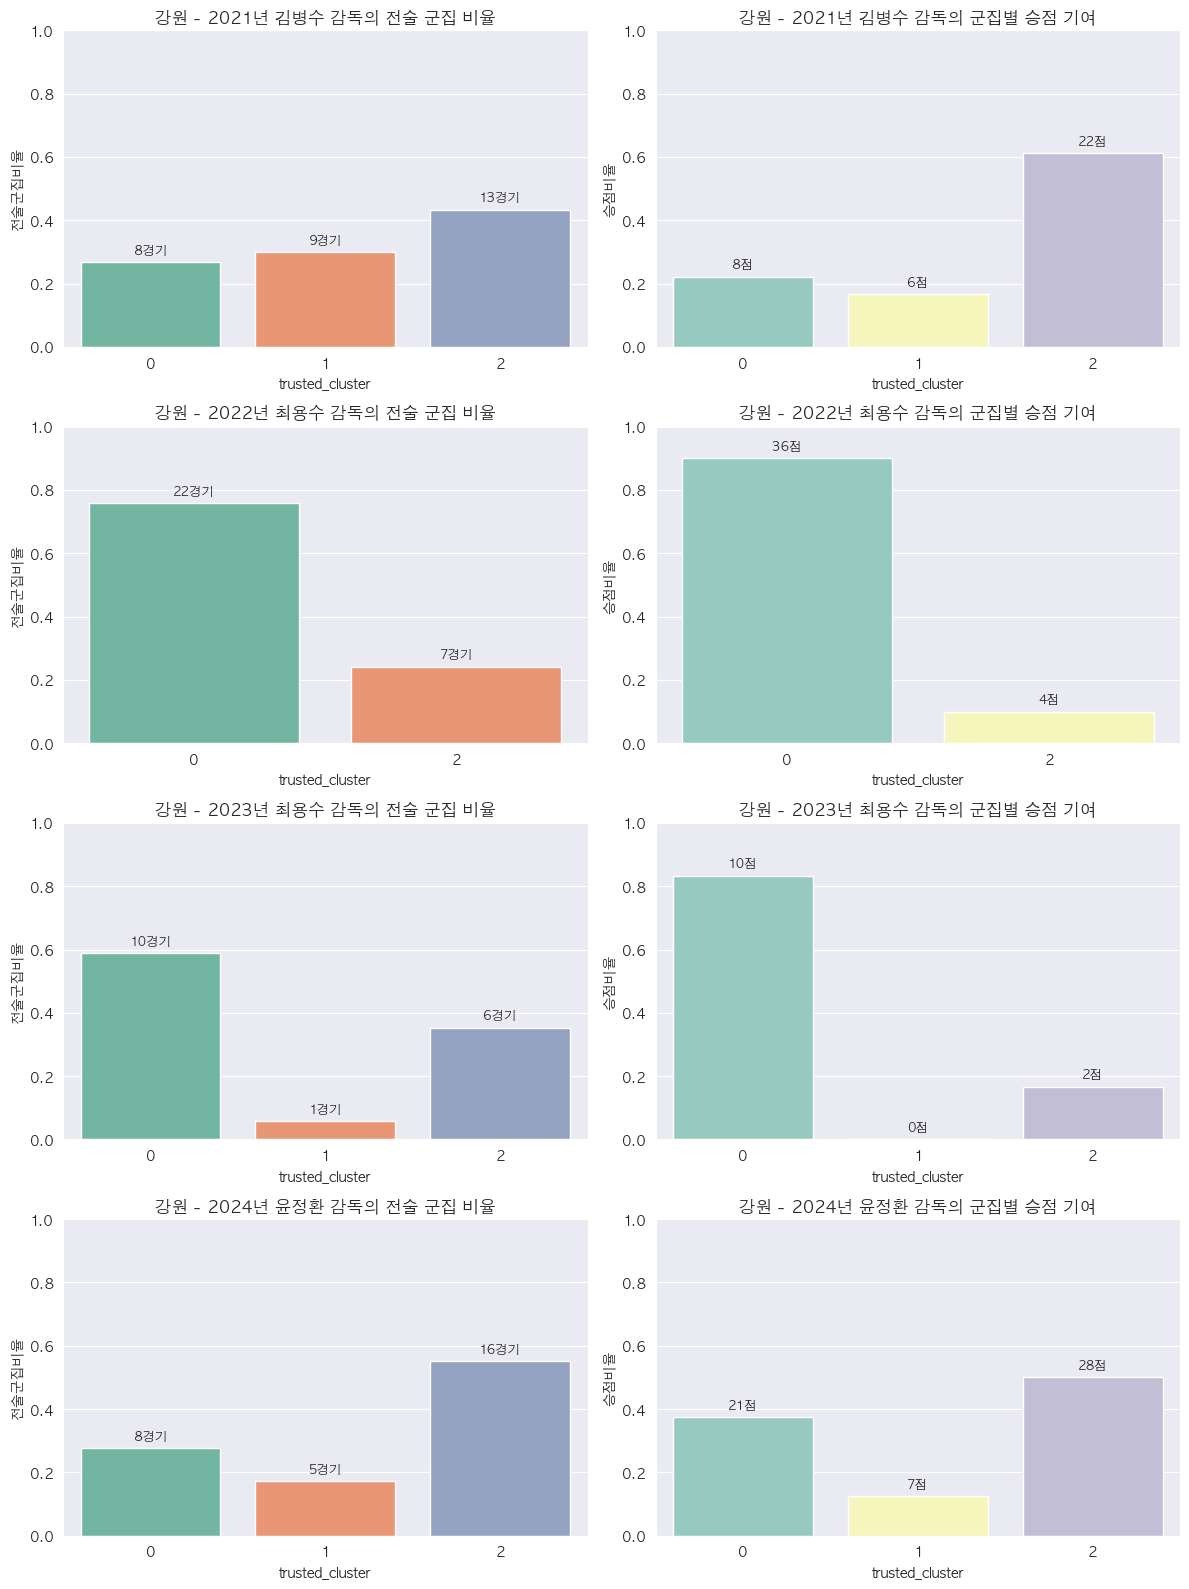

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

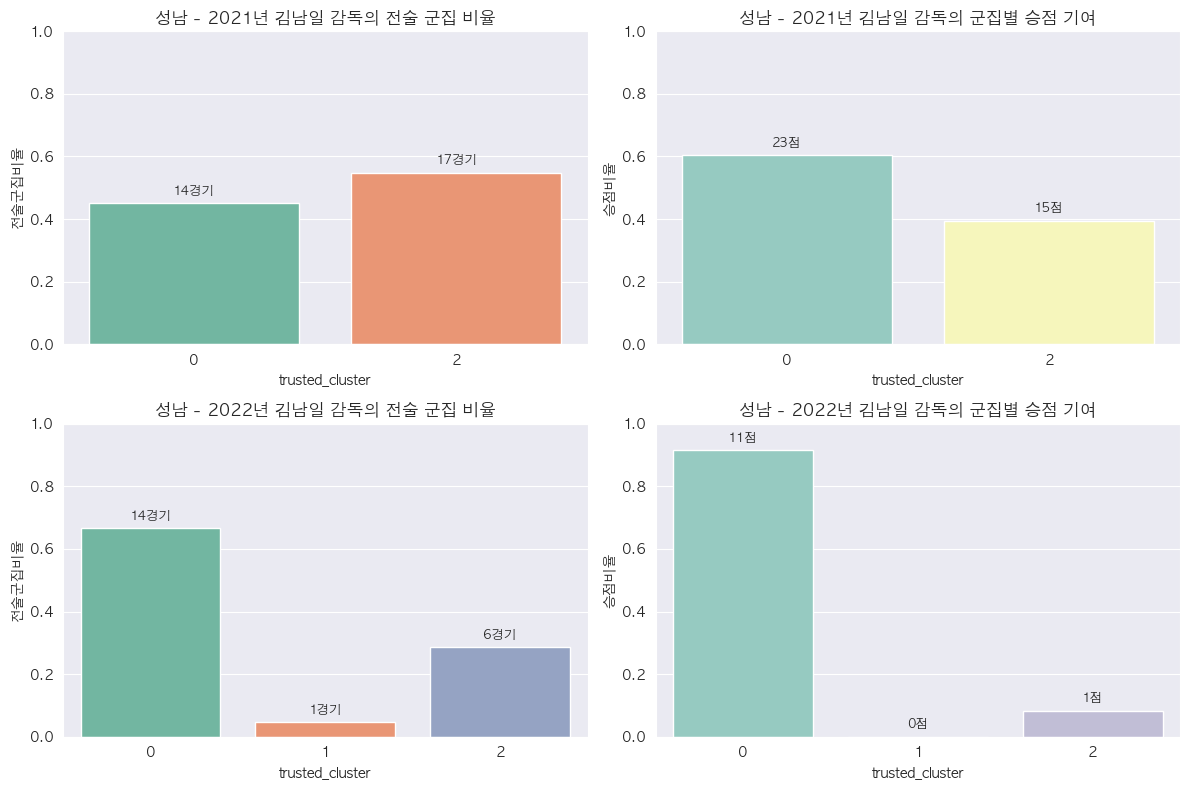

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

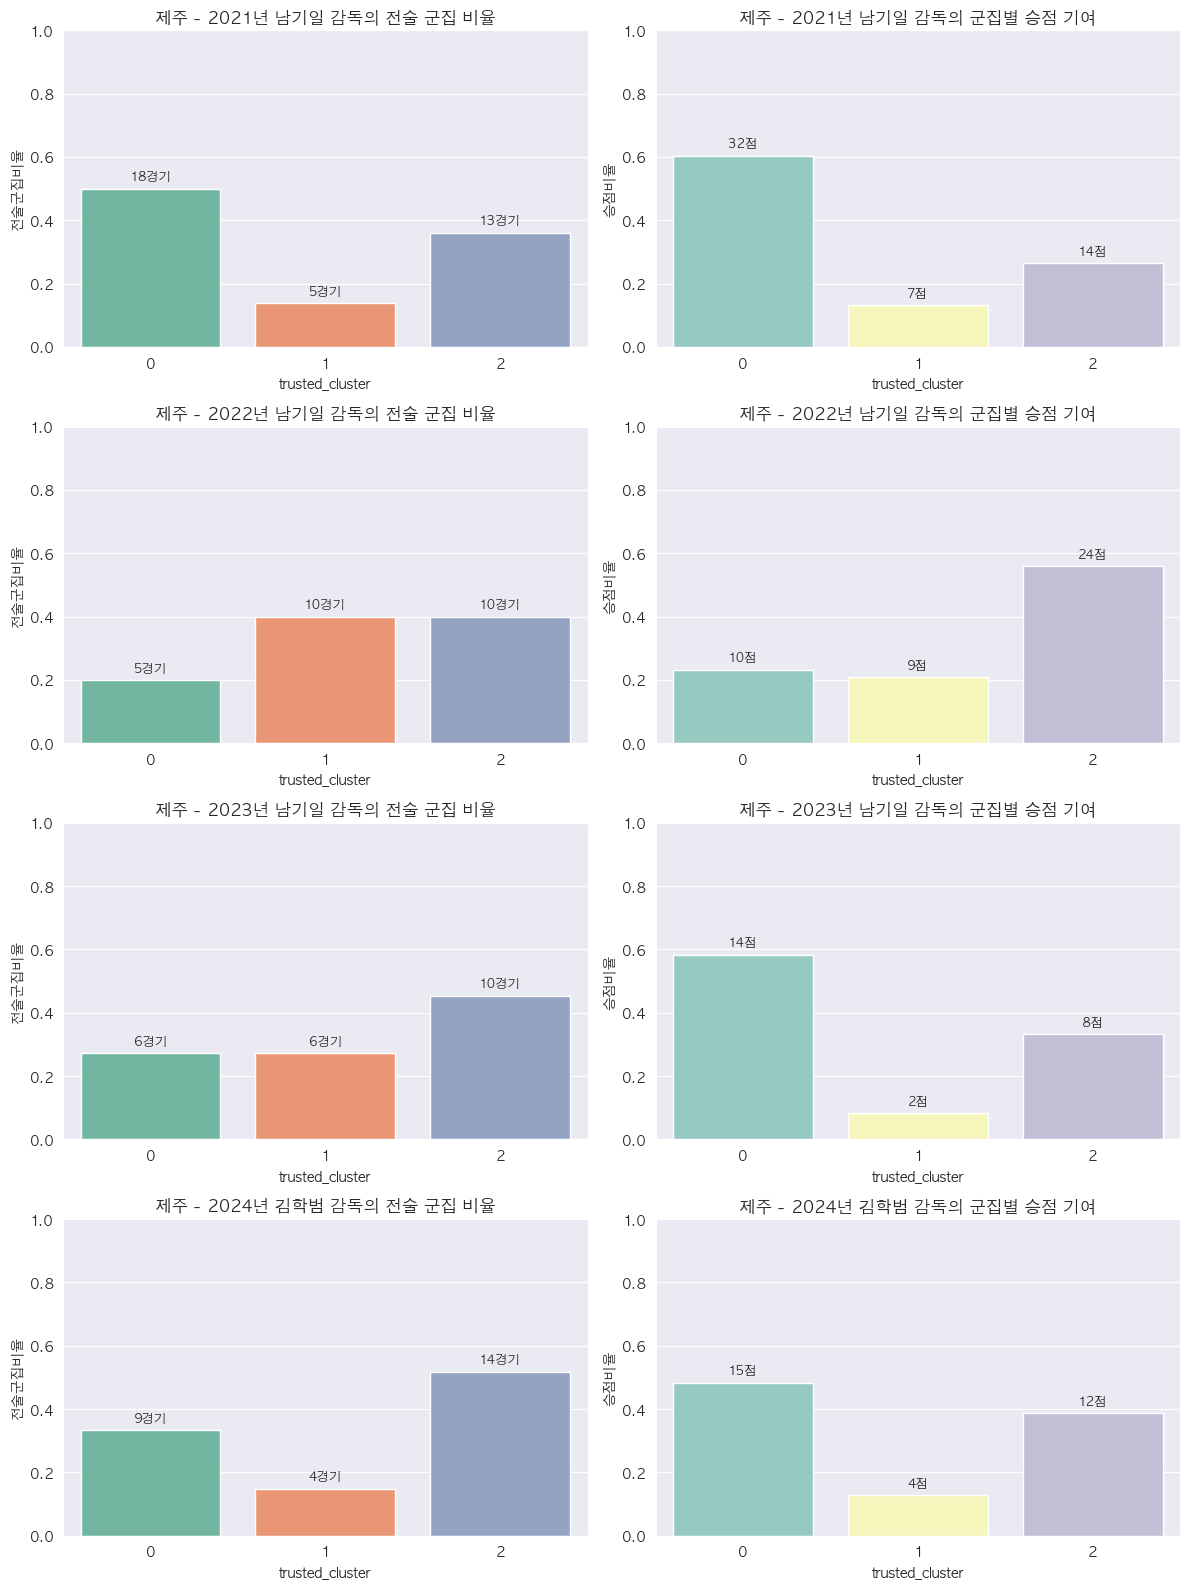

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

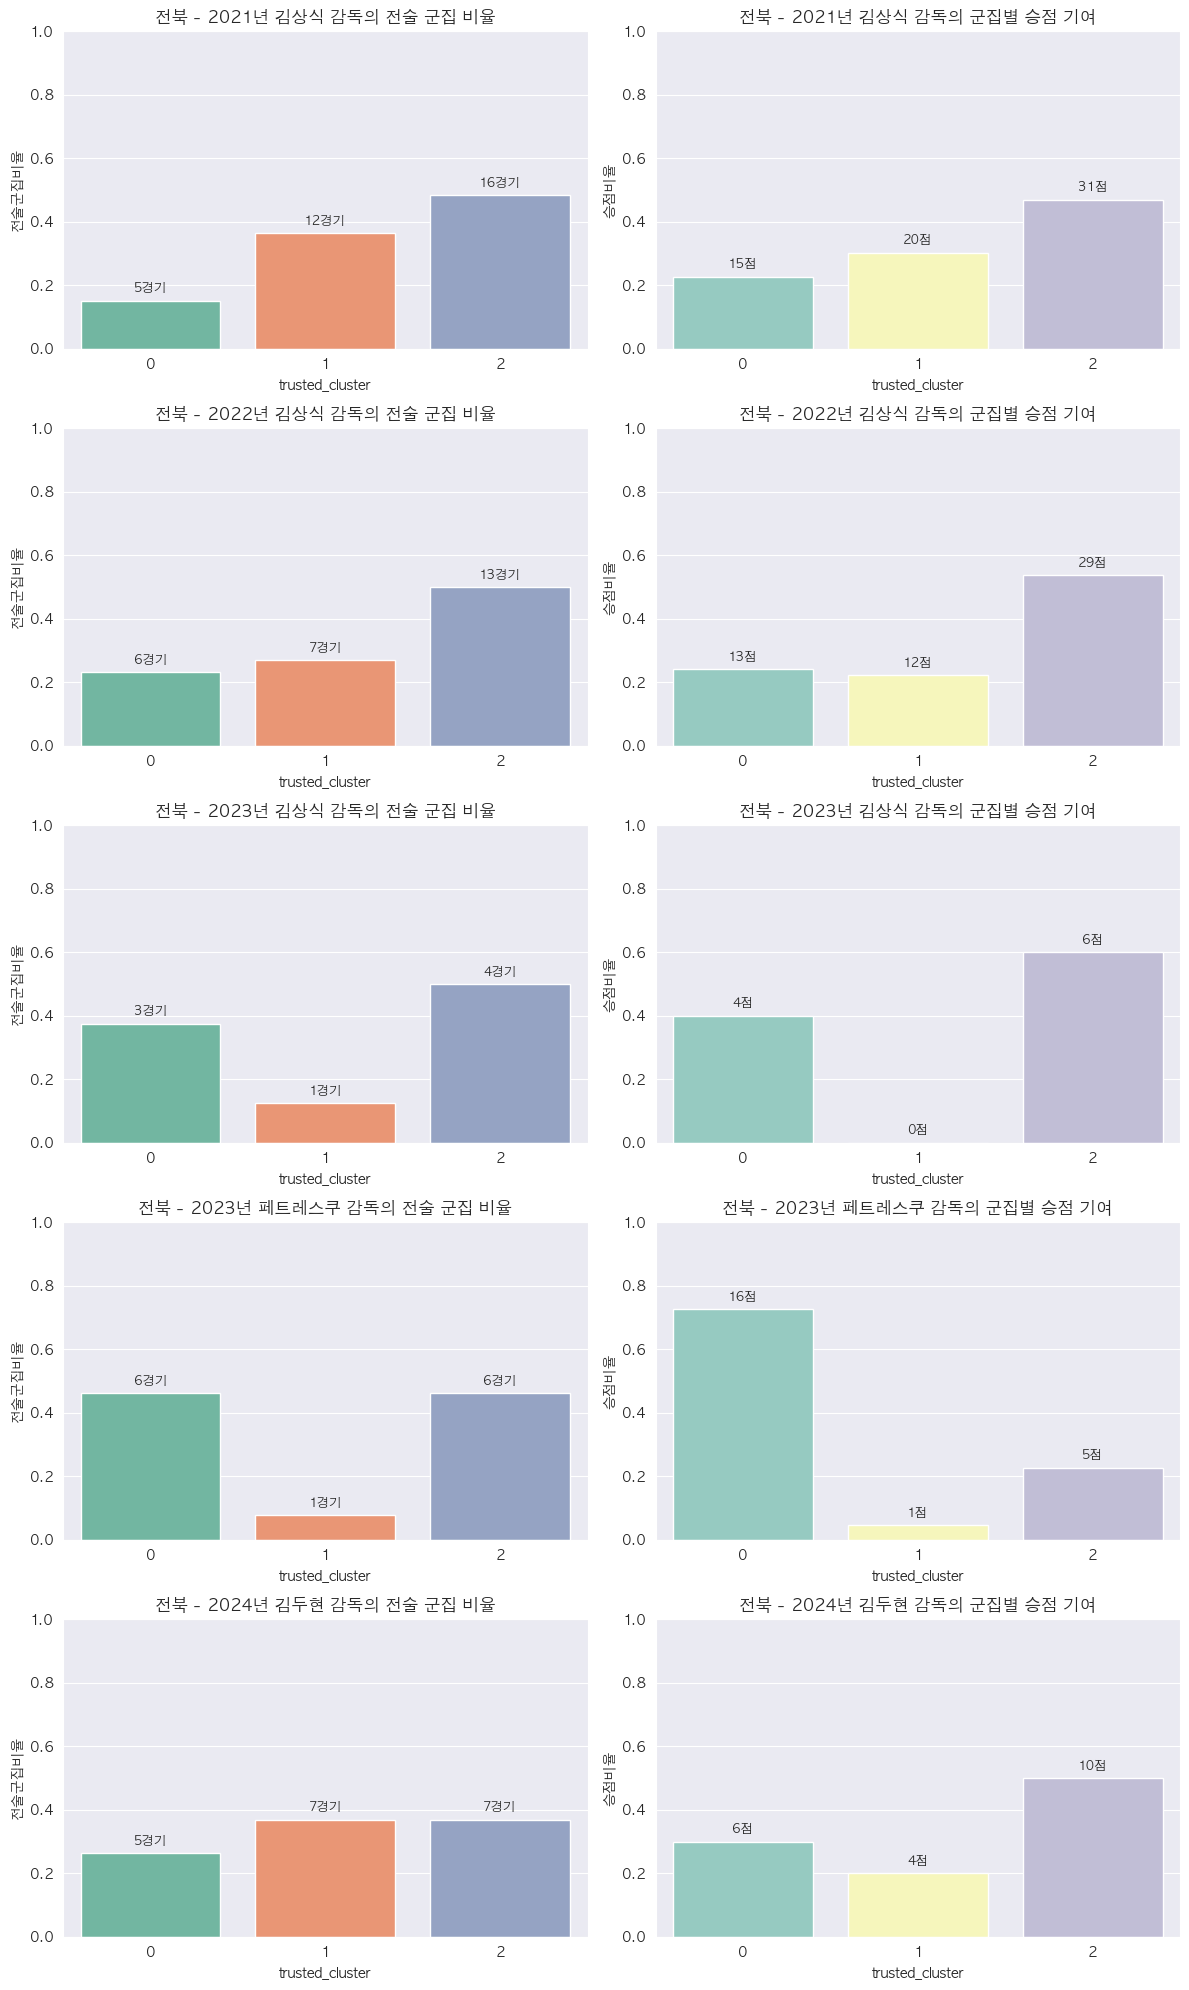

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

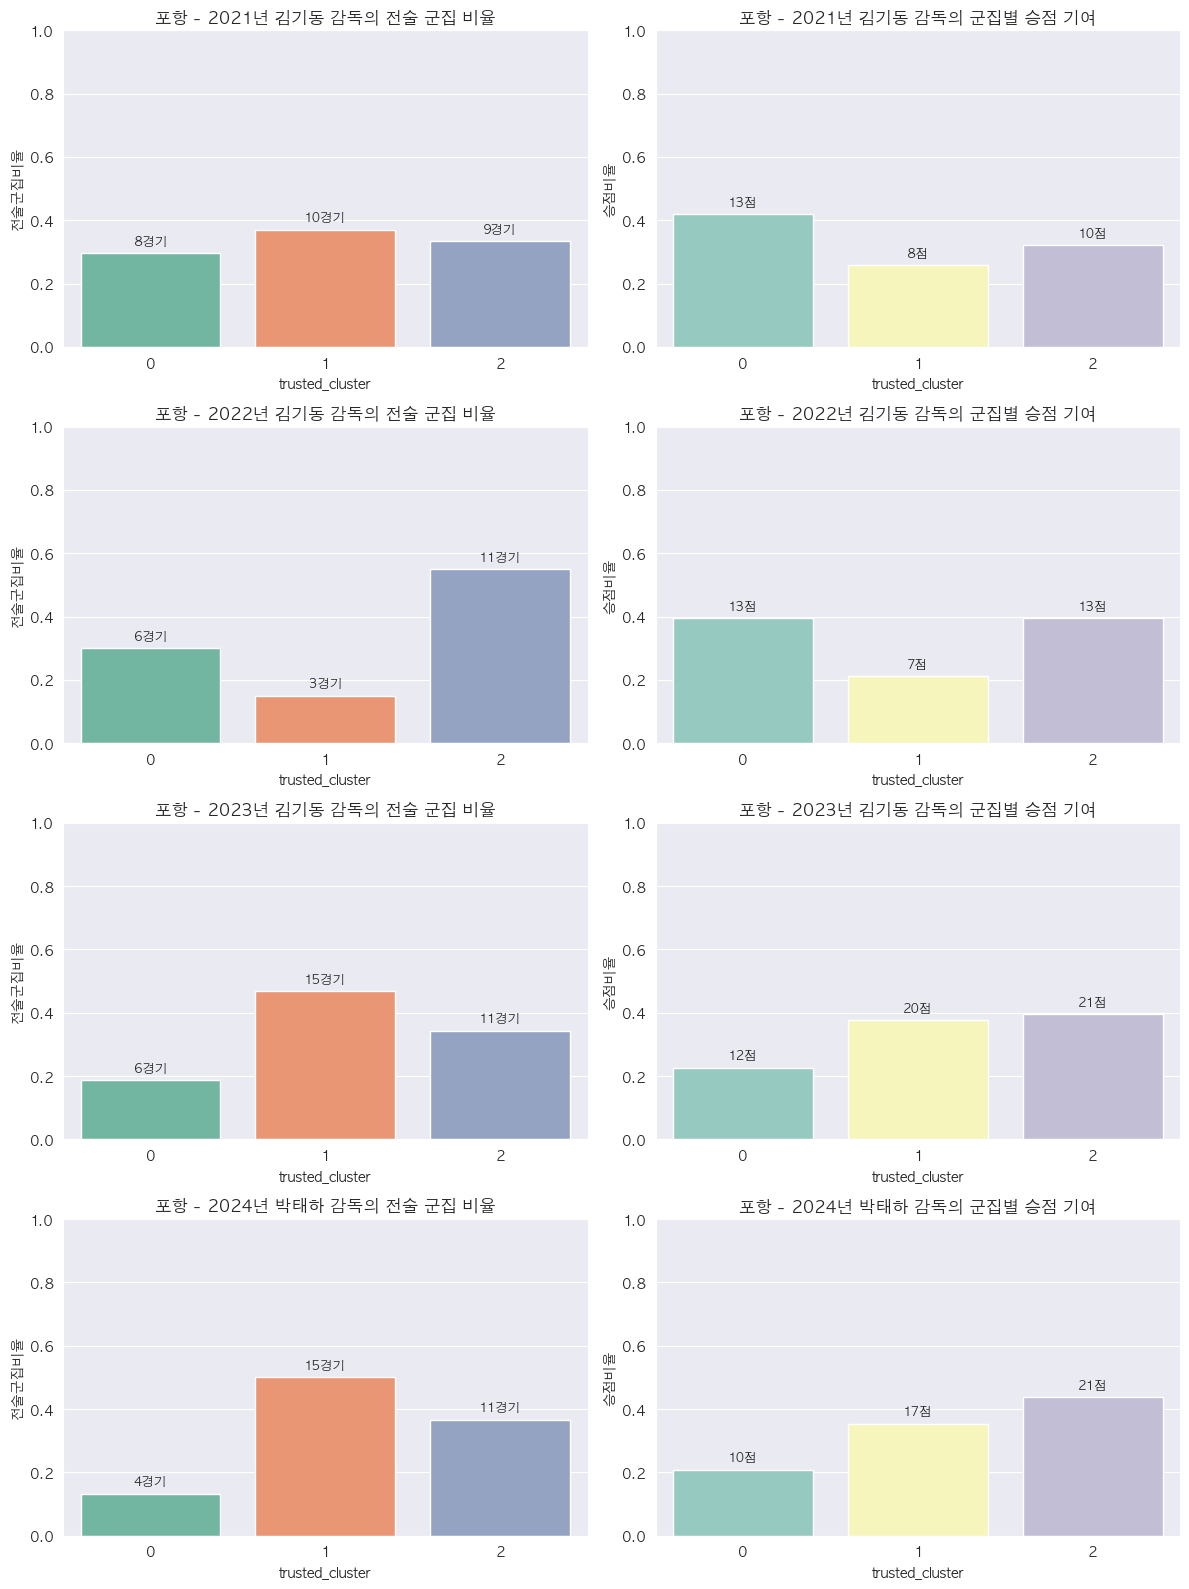

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

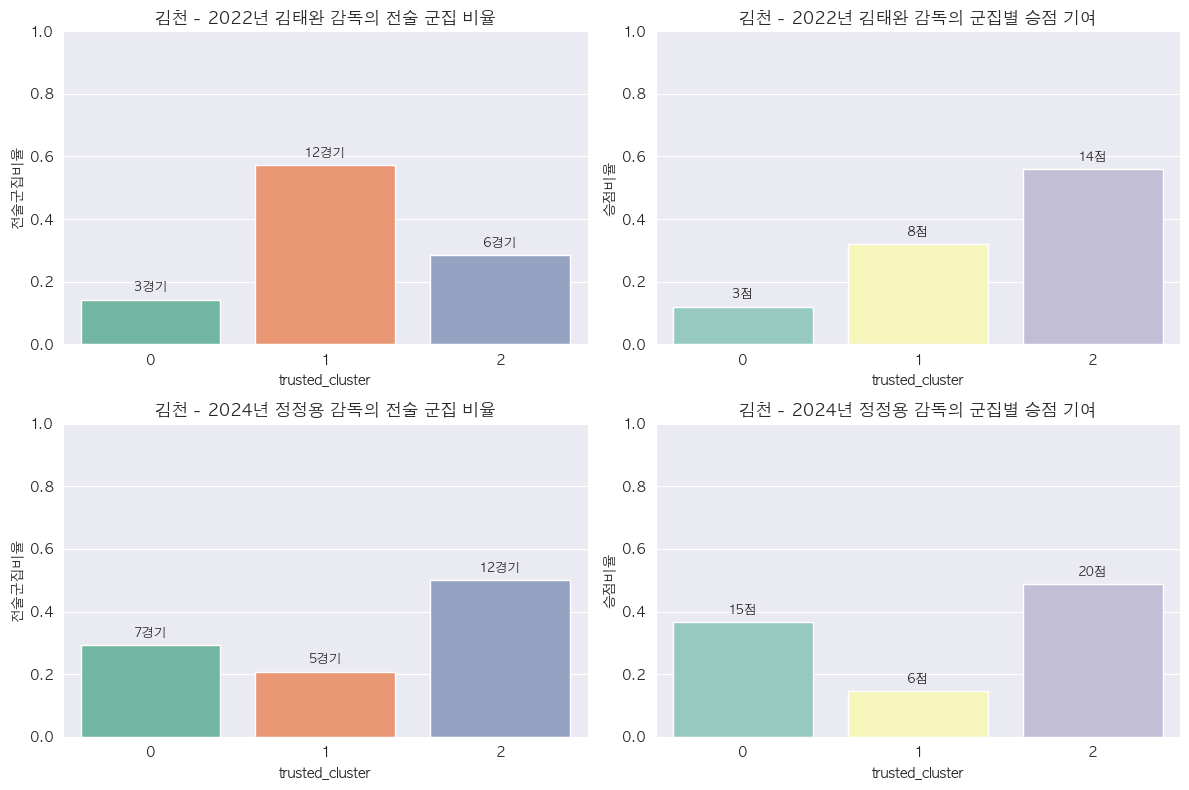

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_18878/1642205243.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

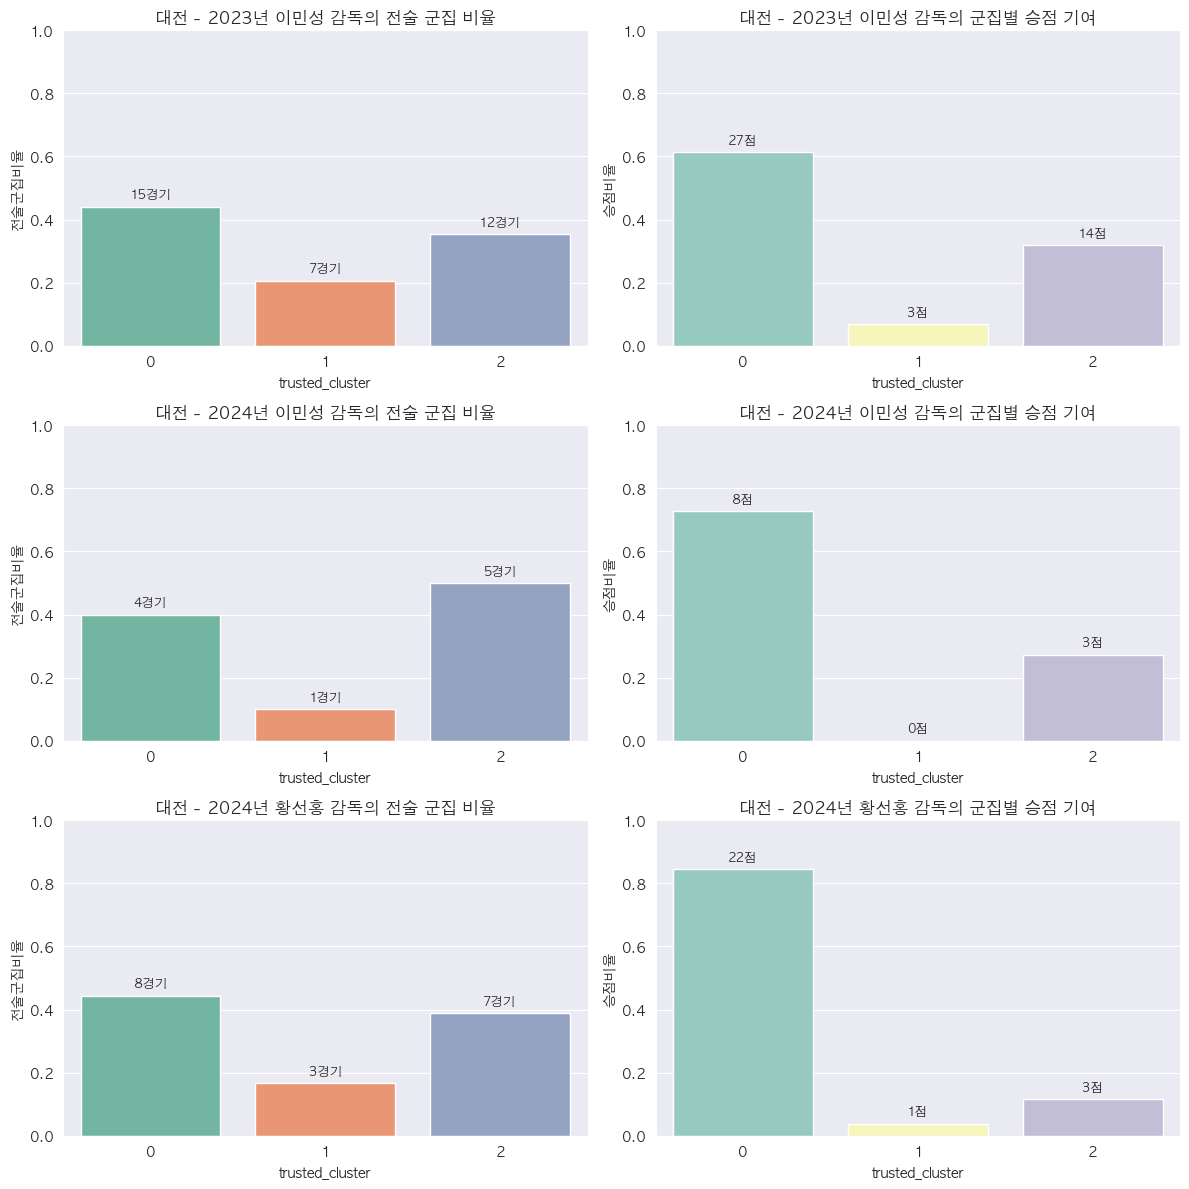

In [29]:
for team in filtered_df['Íµ¨Îã®'].unique():
    ratio_viz_by_manager(team)